# Per-Exercise Classification using fixed length signal of 2 seconds (200 rows) based on restimulus column

**Basic Imports and Helper Functions**

In [2]:
# Imports
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [3]:
def load_data_DB1(subject,exercise):
    data = loadmat(f'../Dataset/DB1/s{subject}/S{subject}_A1_E{exercise}.mat')
    return data

In [4]:
def get_start_indexes(data,movement,target):
    start_indexes=[]
    for idx,move in enumerate(data[target]):
        if move[0] == movement and data[target][idx-1][0] == 0:
            start_indexes.append(idx)
        if len(start_indexes) == 10:
            break
    return start_indexes

In [5]:
from sklearn.preprocessing import StandardScaler


def get_movement_df_standardized(data,movement,target):
    '''
    Returns the repetitions of a movement based on fixed length of repetition.
    if target is stimulus then each rep takes 5 seconds but if target is restimulus then each rep takes 2 seconds
    '''
    start_indexes = get_start_indexes(data,movement,target)
    df= pd.DataFrame()
    step = 500 if target == 'stimulus' else 200
    
    scaler = StandardScaler()
    
    for i in start_indexes:
        move_rep = data['emg'][i:i+step]
        scaler = StandardScaler()
        move_rep_transformed = scaler.fit_transform(move_rep).flatten()
        df = df.append(pd.Series(move_rep_transformed),ignore_index=True)
    target_movement = np.full((10,1),movement,dtype=int)
    df['target'] = target_movement
    return df

In [6]:
def get_movement_df(data,movement,target):
    '''
    Returns the repetitions of a movement based on fixed length of repetition.
    if target is stimulus then each rep takes 5 seconds but if target is restimulus then each rep takes 2 seconds
    '''
    start_indexes = get_start_indexes(data,movement,target)
    df= pd.DataFrame()
    step = 500 if target == 'stimulus' else 200
    for i in start_indexes:
        new_row = data['emg'][i:i+step].flatten()
        df = df.append(pd.Series(new_row),ignore_index=True)
    target_movement = np.full((10,1),movement,dtype=int)
    df['target'] = target_movement
    return df

## Classification of movements for two subjects (7, 19) to compare between different machine learning models

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

models = {"LogisticRegression": LogisticRegression(max_iter=10000),
         "SVC": SVC(kernel='rbf'),
         "RandomForestClassifier": RandomForestClassifier(n_estimators=100),
         "KNN": KNeighborsClassifier(n_neighbors=5)}

### Subject 7

**Exercise 1**

In [69]:
from sklearn.model_selection import train_test_split

np.random.seed(42)

sub7_ex1 = load_data_DB1(subject= 7, exercise=1)

ex1_movements = np.arange(1,13)
sub7_ex1_df = pd.DataFrame()

# Add movements to dataframe
for m in ex1_movements:

    sub7_ex1_df = sub7_ex1_df.append(get_movement_df(data=sub7_ex1, movement=m, target="restimulus"), ignore_index=True)

sub7_ex1_df

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,target
0,0.0024,0.3345,0.0024,0.0024,0.0024,0.0366,0.3003,0.1465,0.0269,0.1660,...,0.5249,0.0122,0.0220,0.0513,0.4932,0.5298,0.3662,0.1367,0.2637,1
1,0.0024,0.1855,0.0024,0.0049,0.0024,0.1636,0.2856,0.1270,0.0024,0.1880,...,0.7153,0.0024,0.0049,0.0244,0.2563,0.5713,0.2148,0.2466,0.2002,1
2,0.0024,0.0684,0.0049,0.0024,0.0024,0.0928,0.3833,0.1343,0.0024,0.1587,...,0.7227,0.0049,0.0073,0.0366,0.5518,0.8130,0.2197,0.1636,0.1880,1
3,0.0024,0.3198,0.0024,0.0049,0.0024,0.2026,0.5054,0.1416,0.0049,0.2734,...,0.8276,0.0171,0.0195,0.0806,0.7886,1.0059,0.3027,0.3979,0.3174,1
4,0.0073,0.1440,0.0024,0.0024,0.0024,0.1465,0.3613,0.1294,0.0024,0.2490,...,0.7080,0.0098,0.0220,0.0757,0.6177,0.9497,0.2661,0.2637,0.2466,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.0024,0.0024,0.0073,0.0024,0.0024,0.0024,0.2295,0.0293,0.0098,0.4663,...,0.0024,0.0024,0.0024,0.0024,0.0024,0.2075,0.0073,0.0122,0.4761,12
116,0.0049,0.0024,0.0024,0.0024,0.0024,0.0073,0.2100,0.0391,0.0146,0.4761,...,0.0464,0.0024,0.0024,0.0049,0.0439,0.2710,0.3491,0.0562,0.4663,12
117,0.0024,0.0024,0.0024,0.0049,0.0024,0.0635,0.2856,0.1221,0.0195,0.4224,...,0.2026,0.0757,0.0024,0.0024,0.0488,0.3101,0.2832,0.1978,0.4517,12
118,0.0024,0.0024,0.0024,0.0024,0.0024,0.0537,0.2002,0.0757,0.0391,0.4272,...,0.0024,0.0024,0.0024,0.0024,0.0073,0.2222,0.1001,0.0024,0.3857,12


In [64]:
X = sub7_ex1_df.drop("target", axis=1)
y = sub7_ex1_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

rfc.score(X_test, y_test)

0.5

In [67]:
from sklearn.model_selection import train_test_split

np.random.seed(42)

sub7_ex1 = load_data_DB1(subject= 7, exercise=1)

ex1_movements = np.arange(1,13)
sub7_ex1_df = pd.DataFrame()

# Add movements to dataframe
for m in ex1_movements:

    sub7_ex1_df = sub7_ex1_df.append(get_movement_df(data=sub7_ex1, movement=m, target="restimulus"), ignore_index=True)

sub7_ex1_df

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,target
0,0.0024,0.3345,0.0024,0.0024,0.0024,0.0366,0.3003,0.1465,0.0269,0.1660,...,0.5249,0.0122,0.0220,0.0513,0.4932,0.5298,0.3662,0.1367,0.2637,1
1,0.0024,0.1855,0.0024,0.0049,0.0024,0.1636,0.2856,0.1270,0.0024,0.1880,...,0.7153,0.0024,0.0049,0.0244,0.2563,0.5713,0.2148,0.2466,0.2002,1
2,0.0024,0.0684,0.0049,0.0024,0.0024,0.0928,0.3833,0.1343,0.0024,0.1587,...,0.7227,0.0049,0.0073,0.0366,0.5518,0.8130,0.2197,0.1636,0.1880,1
3,0.0024,0.3198,0.0024,0.0049,0.0024,0.2026,0.5054,0.1416,0.0049,0.2734,...,0.8276,0.0171,0.0195,0.0806,0.7886,1.0059,0.3027,0.3979,0.3174,1
4,0.0073,0.1440,0.0024,0.0024,0.0024,0.1465,0.3613,0.1294,0.0024,0.2490,...,0.7080,0.0098,0.0220,0.0757,0.6177,0.9497,0.2661,0.2637,0.2466,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.0024,0.0024,0.0073,0.0024,0.0024,0.0024,0.2295,0.0293,0.0098,0.4663,...,0.0024,0.0024,0.0024,0.0024,0.0024,0.2075,0.0073,0.0122,0.4761,12
116,0.0049,0.0024,0.0024,0.0024,0.0024,0.0073,0.2100,0.0391,0.0146,0.4761,...,0.0464,0.0024,0.0024,0.0049,0.0439,0.2710,0.3491,0.0562,0.4663,12
117,0.0024,0.0024,0.0024,0.0049,0.0024,0.0635,0.2856,0.1221,0.0195,0.4224,...,0.2026,0.0757,0.0024,0.0024,0.0488,0.3101,0.2832,0.1978,0.4517,12
118,0.0024,0.0024,0.0024,0.0024,0.0024,0.0537,0.2002,0.0757,0.0391,0.4272,...,0.0024,0.0024,0.0024,0.0024,0.0073,0.2222,0.1001,0.0024,0.3857,12


In [68]:
X = sub7_ex1_df.drop("target", axis=1)
y = sub7_ex1_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

rfc.score(X_test, y_test)

0.8333333333333334

In [115]:
X = sub7_ex1_df.drop("target", axis=1)
y = sub7_ex1_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

sub7_ex1_accs = {}

for label, model in models.items():
    model.fit(X_train, y_train)
    sub7_ex1_accs[label] = round(model.score(X_test, y_test) * 100, 2)

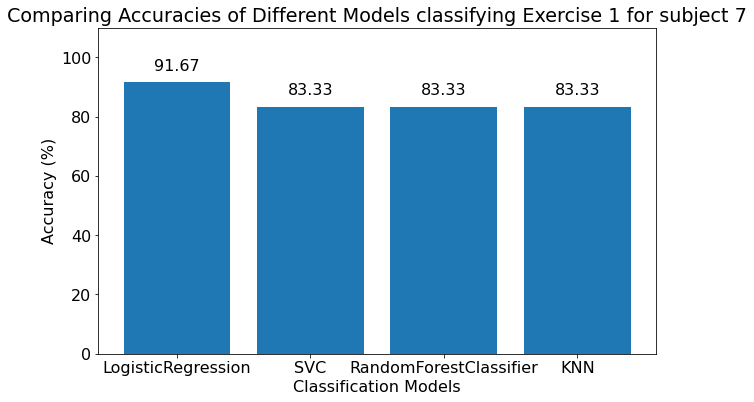

In [155]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

ax.bar(sub7_ex1_accs.keys(), sub7_ex1_accs.values())
ax.set_title("Comparing Accuracies of Different Models classifying Exercise 1 for subject 7")
ax.set_xlabel("Classification Models")
ax.set_ylabel("Accuracy (%)")
ax.set_ylim(0, 110);

rects = ax.patches
for rect, label in zip(rects, sub7_ex1_accs.values()):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 3, round(label, 2 ), ha='center', va='bottom')

**Exercise 2**

In [118]:
from sklearn.model_selection import train_test_split

np.random.seed(42)

sub7_ex2 = load_data_DB1(subject= 7, exercise=2)

ex2_movements = np.arange(1,18)
sub7_ex2_df = pd.DataFrame()

# Add movements to dataframe
for m in ex2_movements:
    sub7_ex2_df = sub7_ex2_df.append(get_movement_df(data=sub7_ex2, movement=m, target="restimulus"))

sub7_ex2_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,target
0,0.0024,0.0024,0.0024,0.0024,0.0024,0.1416,0.4297,0.1636,0.0024,0.1685,...,0.6104,0.0171,0.0049,0.0220,0.1978,1.1890,0.5884,0.1099,0.5298,1
1,0.0024,0.0024,0.0024,0.0024,0.0024,0.0586,0.4272,0.1294,0.0024,0.1807,...,0.6177,0.0098,0.0244,0.0269,0.1904,1.2866,0.5811,0.1465,0.4126,1
2,0.0049,0.0024,0.0024,0.0024,0.0024,0.0879,0.5737,0.1416,0.0024,0.1831,...,0.4590,0.0073,0.0244,0.0293,0.1465,0.8765,0.5835,0.1343,0.3101,1
3,0.0024,0.0024,0.0024,0.0024,0.0049,0.0195,0.1538,0.1099,0.0024,0.1440,...,0.6104,0.0146,0.0220,0.0293,0.1660,1.2427,0.5444,0.1758,0.3735,1
4,0.0171,0.0024,0.0024,0.0024,0.0024,0.0562,0.4199,0.1343,0.0122,0.1880,...,0.6592,0.0342,0.0220,0.0391,0.2246,1.2549,0.6396,0.0854,0.3711,1


In [119]:
X = sub7_ex2_df.drop("target", axis=1)
y = sub7_ex2_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

sub7_ex2_accs = {}

for label, model in models.items():
    model.fit(X_train, y_train)
    sub7_ex2_accs[label] = round(model.score(X_test, y_test) * 100, 2)

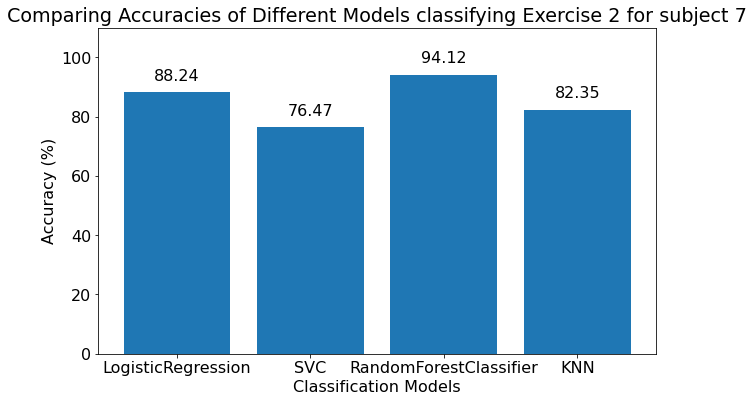

In [153]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

ax.bar(sub7_ex2_accs.keys(), sub7_ex2_accs.values())
ax.set_title("Comparing Accuracies of Different Models classifying Exercise 2 for subject 7")
ax.set_xlabel("Classification Models")
ax.set_ylabel("Accuracy (%)")
ax.set_ylim(0, 110);

rects = ax.patches
for rect, label in zip(rects, sub7_ex2_accs.values()):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 3, round(label, 2 ), ha='center', va='bottom')

**Exercise 3**

In [121]:
from sklearn.model_selection import train_test_split

np.random.seed(42)

sub7_ex3 = load_data_DB1(subject= 7, exercise=3)

ex3_movements = np.arange(1,24)
sub7_ex3_df = pd.DataFrame()

# Add movements to dataframe
for m in ex3_movements:
    sub7_ex3_df = sub7_ex3_df.append(get_movement_df(data=sub7_ex3, movement=m, target="restimulus"))

sub7_ex3_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,target
0,0.0024,0.0024,0.0195,0.0171,0.0293,0.2832,0.3101,0.0903,0.0024,0.2295,...,0.2319,0.0244,0.0757,0.3638,2.0068,0.3345,0.5591,0.3394,0.1538,1
1,0.0024,0.0024,0.0024,0.0024,0.0024,0.1660,0.3809,0.0513,0.0024,0.2295,...,0.3271,0.0879,0.0562,0.3174,2.0557,0.4907,0.5249,0.3418,0.2246,1
2,0.0024,0.0024,0.0024,0.0024,0.0024,0.1221,0.2441,0.4199,0.0024,0.2515,...,0.0488,0.0171,0.1001,0.2490,1.2402,0.4199,0.5469,0.0439,0.2539,1
3,0.0024,0.0024,0.0049,0.0073,0.0049,0.0952,0.0610,0.2124,0.0024,0.2393,...,0.0708,0.0073,0.0195,0.2197,1.3208,0.2271,0.4175,0.1147,0.1733,1
4,0.0049,0.0024,0.0024,0.0024,0.0317,0.3735,0.1563,0.1245,0.0024,0.1636,...,0.0342,0.0049,0.0122,0.1611,1.0278,0.3760,0.4956,0.0342,0.1855,1


In [122]:
X = sub7_ex3_df.drop("target", axis=1)
y = sub7_ex3_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

sub7_ex3_accs = {}

for label, model in models.items():
    model.fit(X_train, y_train)
    sub7_ex3_accs[label] = round(model.score(X_test, y_test) * 100, 2)

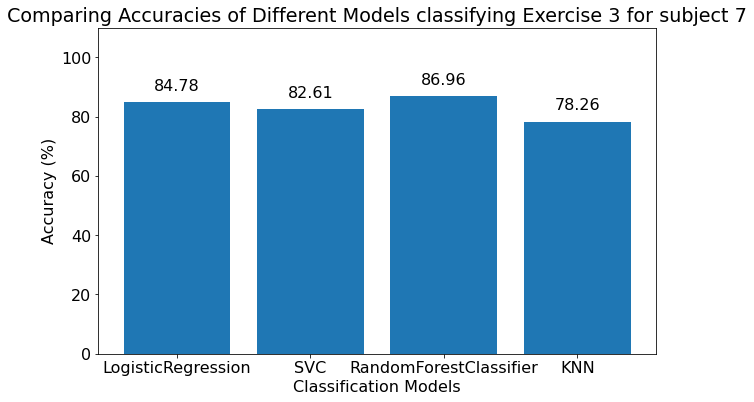

In [156]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))


ax.bar(sub7_ex3_accs.keys(), sub7_ex3_accs.values())
ax.set_title("Comparing Accuracies of Different Models classifying Exercise 3 for subject 7")
ax.set_xlabel("Classification Models")
ax.set_ylabel("Accuracy (%)")
ax.set_ylim(0, 110);

rects = ax.patches
for rect, label in zip(rects, sub7_ex3_accs.values()):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 3, round(label, 2 ), ha='center', va='bottom')

### Subject 19

**Exercise 1**

In [124]:
from sklearn.model_selection import train_test_split

np.random.seed(42)

sub19_ex1 = load_data_DB1(subject= 19, exercise=1)

ex1_movements = np.arange(1,13)
sub19_ex1_df = pd.DataFrame()

# Add movements to dataframe
for m in ex1_movements:
    sub19_ex1_df = sub19_ex1_df.append(get_movement_df(data=sub19_ex1, movement=m, target="restimulus"))

sub19_ex1_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,target
0,0.0977,0.0024,0.0024,0.0024,0.0049,0.0024,0.0073,0.3564,0.0024,0.1318,...,0.0024,0.0293,0.0024,0.0024,0.0024,0.0024,0.2881,0.0171,0.0195,1
1,0.0342,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.2856,0.0024,0.0854,...,0.0024,0.2344,0.0757,0.0049,0.0024,0.0073,0.2539,0.0806,0.0269,1
2,0.0073,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.2197,0.0024,0.0220,...,0.0024,0.2002,0.0659,0.0049,0.0024,0.0024,0.3247,0.0830,0.0171,1
3,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.1270,0.0024,0.0122,...,0.0854,0.0024,0.0024,0.0024,0.0024,0.0024,0.0757,0.0024,0.0024,1
4,0.6763,0.1099,0.0244,0.0024,0.0024,0.0024,0.0024,0.0342,0.0024,0.0024,...,0.0488,0.0928,0.0098,0.0024,0.0024,0.0024,0.2881,0.0171,0.0220,1


In [125]:
X = sub19_ex1_df.drop("target", axis=1)
y = sub19_ex1_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

sub19_ex1_accs = {}

for label, model in models.items():
    model.fit(X_train, y_train)
    sub19_ex1_accs[label] = round(model.score(X_test, y_test) * 100, 2)

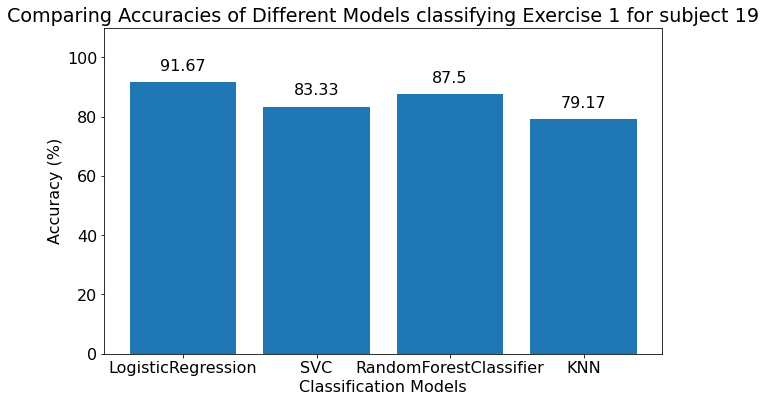

In [158]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

ax.bar(sub19_ex1_accs.keys(), sub19_ex1_accs.values())
ax.set_title("Comparing Accuracies of Different Models classifying Exercise 1 for subject 19")
ax.set_xlabel("Classification Models")
ax.set_ylabel("Accuracy (%)")
ax.set_ylim(0, 110);

rects = ax.patches
for rect, label in zip(rects, sub19_ex1_accs.values()):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 3, round(label, 2 ), ha='center', va='bottom')

**Exercise 2**

In [127]:
from sklearn.model_selection import train_test_split

np.random.seed(42)

sub19_ex2 = load_data_DB1(subject= 19, exercise=2)

ex2_movements = np.arange(1,18)
sub19_ex2_df = pd.DataFrame()

# Add movements to dataframe
for m in ex2_movements:
    sub19_ex2_df = sub19_ex2_df.append(get_movement_df(data=sub19_ex2, movement=m, target="restimulus"))

sub19_ex2_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,target
0,1.0376,0.1172,0.3271,0.2173,0.0220,0.0024,0.2588,0.4492,0.3271,2.0483,...,0.6201,0.1880,0.0098,0.0024,0.0024,0.0293,0.2563,0.0415,0.2856,1
1,0.6592,0.2710,0.0024,0.0024,0.0024,0.0024,0.0024,0.2051,0.0024,0.0098,...,0.2661,0.2637,0.0830,0.0024,0.0024,0.1025,0.3369,0.0635,0.3662,1
2,0.4370,0.4175,0.0024,0.0024,0.0024,0.0024,0.0195,0.4175,0.0024,0.0635,...,0.5029,0.4297,0.0439,0.0024,0.0024,0.1782,0.5981,0.1050,0.5933,1
3,0.5859,0.3101,0.0049,0.0024,0.0024,0.0024,0.0122,0.4639,0.0024,0.0659,...,0.6934,0.2637,0.0244,0.0024,0.0024,0.0708,0.2686,0.0537,0.7520,1
4,0.4004,0.3076,0.0024,0.0024,0.0024,0.0024,0.0146,0.3296,0.0024,0.0415,...,0.3394,0.4541,0.1904,0.0024,0.0024,0.0439,0.2759,0.2783,0.9302,1


In [128]:
X = sub19_ex2_df.drop("target", axis=1)
y = sub19_ex2_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

sub19_ex2_accs = {}

for label, model in models.items():
    model.fit(X_train, y_train)
    sub19_ex2_accs[label] = round(model.score(X_test, y_test) * 100, 2)

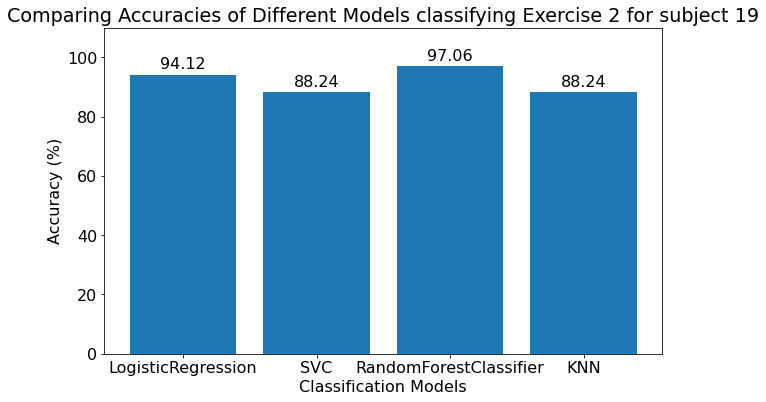

In [159]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

ax.bar(sub19_ex2_accs.keys(), sub19_ex2_accs.values())
ax.set_title("Comparing Accuracies of Different Models classifying Exercise 2 for subject 19")
ax.set_xlabel("Classification Models")
ax.set_ylabel("Accuracy (%)")
ax.set_ylim(0, 110);

rects = ax.patches
for rect, label in zip(rects, sub19_ex2_accs.values()):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 1, round(label, 2 ), ha='center', va='bottom')

**Exercise 3**

In [133]:
from sklearn.model_selection import train_test_split

np.random.seed(42)

sub19_ex3 = load_data_DB1(subject=19, exercise=3)

ex3_movements = np.arange(1,24)
sub19_ex3_df = pd.DataFrame()

# Add movements to dataframe
for m in ex3_movements:
    sub19_ex3_df = sub19_ex3_df.append(get_movement_df(data=sub19_ex3, movement=m, target="restimulus"))

sub19_ex3_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,target
0,0.0757,0.0024,0.0024,0.0024,0.0024,0.0024,0.1538,0.0220,0.0024,0.0049,...,0.9351,0.0830,0.1270,0.0171,0.0488,1.3818,0.5396,0.0684,0.1929,1
1,0.1440,0.0366,0.0024,0.0024,0.0024,0.0024,0.0684,0.0122,0.0024,0.0122,...,0.5176,0.0024,0.0024,0.0024,0.0171,0.5615,0.1929,0.0024,0.0513,1
2,0.0488,0.0024,0.0024,0.0024,0.0024,0.0024,0.0391,0.0366,0.0024,0.0049,...,0.4980,0.0195,0.0024,0.0024,0.0635,0.7495,0.3003,0.0024,0.1221,1
3,0.0073,0.0024,0.0024,0.0024,0.0024,0.0024,0.0757,0.0488,0.0024,0.0391,...,0.4346,0.0293,0.0098,0.0024,0.0415,0.7080,0.3638,0.0073,0.0806,1
4,0.0562,0.0024,0.0024,0.0024,0.0024,0.0024,0.0464,0.0635,0.0024,0.0220,...,0.5542,0.1099,0.0635,0.0171,0.0757,1.0718,0.4102,0.0244,0.1514,1


In [135]:
X = sub19_ex3_df.drop("target", axis=1)
y = sub19_ex3_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

sub19_ex3_accs = {}

for label, model in models.items():
    model.fit(X_train, y_train)
    sub19_ex3_accs[label] = round(model.score(X_test, y_test) * 100, 2)

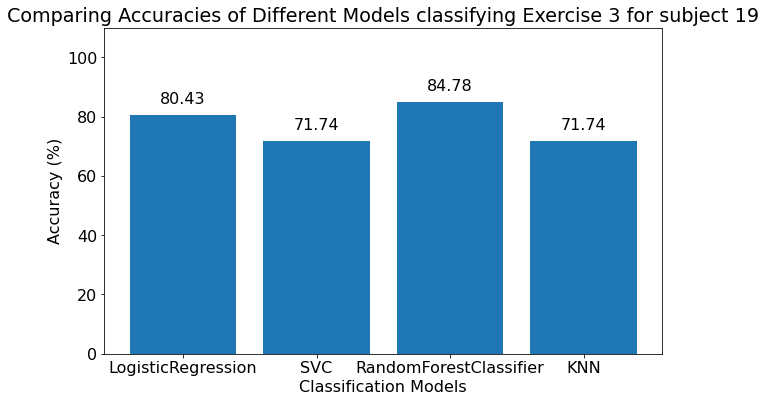

In [160]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

ax.bar(sub19_ex3_accs.keys(), sub19_ex3_accs.values())
ax.set_title("Comparing Accuracies of Different Models classifying Exercise 3 for subject 19")
ax.set_xlabel("Classification Models")
ax.set_ylabel("Accuracy (%)")
ax.set_ylim(0, 110);

rects = ax.patches
for rect, label in zip(rects, sub19_ex3_accs.values()):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 3, round(label, 2 ), ha='center', va='bottom')

**Models Used**

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

models = {"LogisticRegression": LogisticRegression(max_iter=10000, n_jobs=-1),
         "SVC": SVC(kernel='rbf'),
         "RandomForestClassifier": RandomForestClassifier(n_estimators=100, n_jobs=-1),
         "KNN": KNeighborsClassifier(n_neighbors=5, n_jobs=-1)}

# 0. Showing data representation

In [9]:
sub_data = load_data_DB1(subject=13, exercise=2)

sub_data_df = get_movement_df(data=sub_data, movement=3, target='restimulus')
sub_data_df

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,target
0,0.0073,0.0024,0.0024,0.0024,0.0024,0.0244,0.0830,0.1245,0.0049,0.4688,...,1.2549,0.2881,0.0024,0.0391,0.2075,2.2266,0.7007,0.4492,0.5005,3
1,0.0024,0.0024,0.0098,0.0024,0.0024,0.0317,0.0342,0.0928,0.0049,0.3491,...,0.8008,0.3027,0.0024,0.0024,0.1147,1.7114,0.8325,0.2686,0.2637,3
2,0.0049,0.0024,0.0122,0.0024,0.0024,0.0635,0.0781,0.1074,0.0073,0.2515,...,0.1294,0.0146,0.0024,0.0024,0.0854,0.4346,0.1929,0.0635,0.2783,3
3,0.0024,0.0024,0.0024,0.0024,0.0024,0.0391,0.0708,0.1221,0.0073,0.2832,...,0.8252,0.1587,0.0024,0.0024,0.1758,1.9531,0.7715,0.2417,0.2539,3
4,0.0024,0.0024,0.0073,0.0024,0.0024,0.0781,0.1123,0.1196,0.0146,0.2979,...,0.7983,0.2319,0.0024,0.0098,0.1465,1.0889,0.5493,0.2466,0.2563,3
5,0.0024,0.0244,0.0122,0.0024,0.0024,0.0024,0.0732,0.1270,0.0024,0.2686,...,1.0962,0.2686,0.0073,0.0269,0.2612,2.1191,0.9204,0.4077,0.2734,3
6,0.0024,0.0098,0.0122,0.0024,0.0024,0.0366,0.1099,0.1172,0.0073,0.2808,...,0.7910,0.2319,0.0024,0.0146,0.2148,1.4819,0.5518,0.2295,0.2734,3
7,0.0024,0.0122,0.0098,0.0024,0.0024,0.0024,0.0977,0.1318,0.0024,0.2783,...,1.0083,0.1660,0.0024,0.0049,0.1001,1.0986,0.8276,0.1733,0.2393,3
8,0.0024,0.0024,0.0146,0.0024,0.0024,0.0146,0.1465,0.1636,0.0244,0.2905,...,0.0024,0.0049,0.0024,0.0073,0.1831,0.2905,0.1733,0.0024,0.2563,3
9,0.0024,0.0317,0.0220,0.0024,0.0024,0.0024,0.1001,0.1538,0.0122,0.2515,...,0.7202,0.1953,0.0024,0.0122,0.1660,1.6943,0.6885,0.1855,0.2783,3


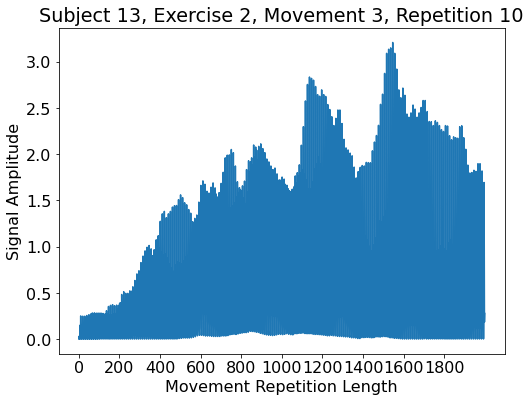

In [16]:
# Plot Average Accuracies for exercise 1
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
plt.rcParams.update({'font.size': 16})

ax.plot(np.arange(0,2000), sub_data_df.iloc[9].drop("target"))
ax.set_title("Subject 13, Exercise 2, Movement 3, Repetition 10")
ax.set_xlabel("Movement Repetition Length")
ax.set_xticks(np.arange(0,2000,200))
ax.set_ylabel("Signal Amplitude");

# 1. Classification of movements per exercise per subjects

**Exercise 1**

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

np.random.seed(42)

# test_acc_ex1_rf = []
# test_acc_ex1_log = []

test_accuracy_models = {}
# Initialize lists for each model .. Each list should contain 27 values(number of subjects)

for label, model in models.items():
    test_accuracy_models[label] = []
    
ex1_movements = np.arange(1,13)

# Iterate over 27 subjects of DB1 and trying to classify exercise 1 
for sub in np.arange(1,28):
    
    # Load the data 
    data = load_data_DB1(subject=sub, exercise=1)
    
    # Iterate over all movements and add them into a df
    df = pd.DataFrame()
    for m in ex1_movements:
        df = df.append(get_movement_df(data=data, movement=m, target="restimulus"),ignore_index=True)
    
    # Getting X & y
    X = df.drop("target", axis=1)
    y = df["target"]
        
    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
    
    #Fitting the model
    for label, model in models.items():

        model.fit(X_train, y_train)
        score = round(model.score(X_test, y_test) * 100, 3)
        test_accuracy_models[label].append(score)
        print(f"Test Accuracy for subject {sub} in exercise 1 using {label} is {score}")
    
    print("-----------------------------------------------------------------------------------")

for label, model in models.items():
    print(f"Average Test Accuracy for all subjects in exercise 1 using {label} {np.mean(test_accuracy_models[label])}")


Test Accuracy for subject 1 in exercise 1 using LogisticRegression is 83.333
Test Accuracy for subject 1 in exercise 1 using SVC is 75.0
Test Accuracy for subject 1 in exercise 1 using RandomForestClassifier is 83.333
Test Accuracy for subject 1 in exercise 1 using KNN is 66.667
-----------------------------------------------------------------------------------
Test Accuracy for subject 2 in exercise 1 using LogisticRegression is 91.667
Test Accuracy for subject 2 in exercise 1 using SVC is 91.667
Test Accuracy for subject 2 in exercise 1 using RandomForestClassifier is 100.0
Test Accuracy for subject 2 in exercise 1 using KNN is 87.5
-----------------------------------------------------------------------------------
Test Accuracy for subject 3 in exercise 1 using LogisticRegression is 91.667
Test Accuracy for subject 3 in exercise 1 using SVC is 79.167
Test Accuracy for subject 3 in exercise 1 using RandomForestClassifier is 83.333
Test Accuracy for subject 3 in exercise 1 using KNN i

Test Accuracy for subject 23 in exercise 1 using RandomForestClassifier is 91.667
Test Accuracy for subject 23 in exercise 1 using KNN is 75.0
-----------------------------------------------------------------------------------
Test Accuracy for subject 24 in exercise 1 using LogisticRegression is 87.5
Test Accuracy for subject 24 in exercise 1 using SVC is 75.0
Test Accuracy for subject 24 in exercise 1 using RandomForestClassifier is 79.167
Test Accuracy for subject 24 in exercise 1 using KNN is 75.0
-----------------------------------------------------------------------------------
Test Accuracy for subject 25 in exercise 1 using LogisticRegression is 95.833
Test Accuracy for subject 25 in exercise 1 using SVC is 91.667
Test Accuracy for subject 25 in exercise 1 using RandomForestClassifier is 95.833
Test Accuracy for subject 25 in exercise 1 using KNN is 100.0
-----------------------------------------------------------------------------------
Test Accuracy for subject 26 in exercise

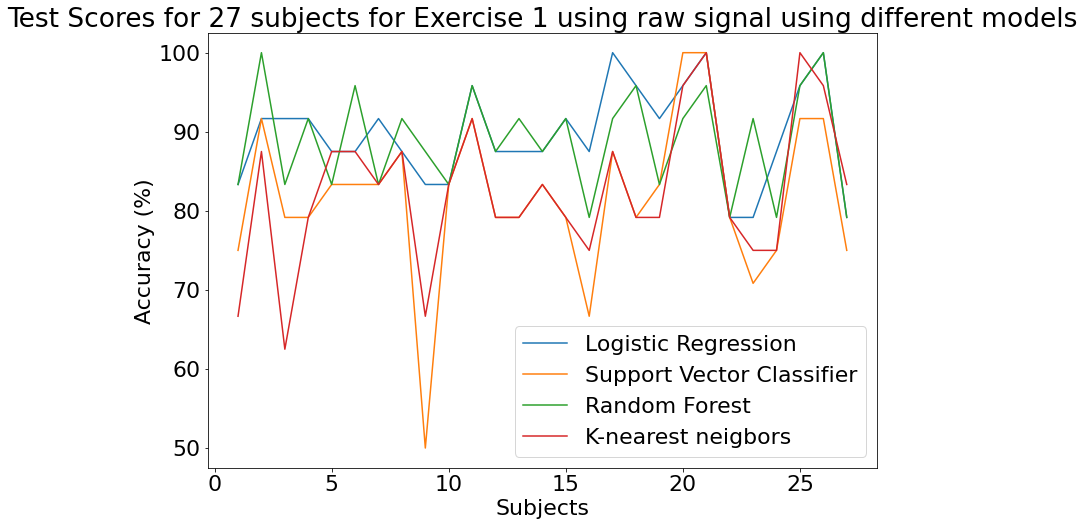

In [93]:
# Plot Average Accuracies for exercise 1
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
plt.rcParams.update({'font.size': 22})

for label, model in models.items():
    ax.plot(np.arange(1,28), test_accuracy_models[label])

ax.set_title("Test Scores for 27 subjects for Exercise 1 using raw signal using different models")
ax.set_xlabel("Subjects")
ax.set_ylabel("Accuracy (%)")
ax.legend(['Logistic Regression','Support Vector Classifier', 'Random Forest', 'K-nearest neigbors' ]);

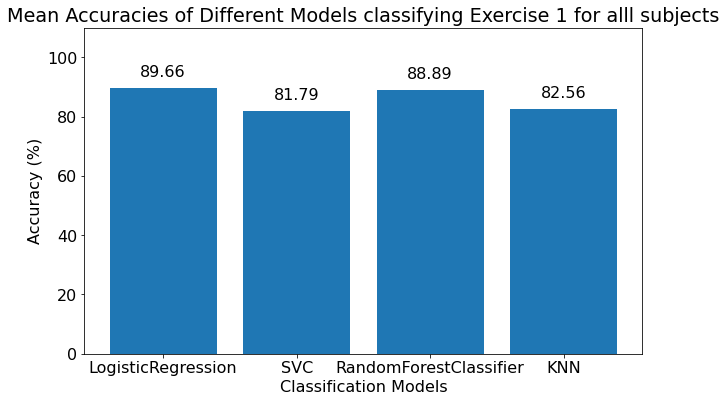

In [95]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

mean_accuracies_ex1 = {}

for label, model in models.items():
    mean_accuracies_ex1[label] = np.mean(test_accuracy_models[label])

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

ax.bar(mean_accuracies_ex1.keys(), mean_accuracies_ex1.values())
ax.set_title("Mean Accuracies of Different Models classifying Exercise 1 for alll subjects")
ax.set_xlabel("Classification Models")
ax.set_ylabel("Accuracy (%)")
ax.set_ylim(0, 110);

rects = ax.patches
for rect, label in zip(rects, mean_accuracies_ex1.values()):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 3, round(label, 2 ), ha='center', va='bottom')

**Exercise 2**

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

np.random.seed(42)

test_accuracy_models_ex2 = {}
# Initialize lists for each model .. Each list should contain 27 values(number of subjects)

for label, model in models.items():
    test_accuracy_models_ex2[label] = []
    
ex2_movements = np.arange(1,18)

# Iterate over 27 subjects of DB1 and trying to classify exercise 1 
for sub in np.arange(1,28):
    
    # Load the data 
    data = load_data_DB1(subject=sub, exercise=2)
    
    # Iterate over all movements and add them into a df
    df = pd.DataFrame()
    for m in ex2_movements:
        df = df.append(get_movement_df(data=data, movement=m, target="restimulus"),ignore_index=True)
    
    # Getting X & y
    X = df.drop("target", axis=1)
    y = df["target"]
        
    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
    
    #Fitting the model
    for label, model in models.items():

        model.fit(X_train, y_train)
        score = round(model.score(X_test, y_test) * 100, 3)
        test_accuracy_models_ex2[label].append(score)
        print(f"Test Accuracy for subject {sub} in exercise 2 using {label} is {score}")
    
    print("-----------------------------------------------------------------------------------")

for label, model in models.items():
    print(f"Average Test Accuracy for all subjects in exercise 2 using {label} {np.mean(test_accuracy_models_ex2[label])}")


Test Accuracy for subject 1 in exercise 2 using LogisticRegression is 82.353
Test Accuracy for subject 1 in exercise 2 using SVC is 76.471
Test Accuracy for subject 1 in exercise 2 using RandomForestClassifier is 82.353
Test Accuracy for subject 1 in exercise 2 using KNN is 79.412
-----------------------------------------------------------------------------------
Test Accuracy for subject 2 in exercise 2 using LogisticRegression is 91.176
Test Accuracy for subject 2 in exercise 2 using SVC is 88.235
Test Accuracy for subject 2 in exercise 2 using RandomForestClassifier is 91.176
Test Accuracy for subject 2 in exercise 2 using KNN is 82.353
-----------------------------------------------------------------------------------
Test Accuracy for subject 3 in exercise 2 using LogisticRegression is 91.176
Test Accuracy for subject 3 in exercise 2 using SVC is 79.412
Test Accuracy for subject 3 in exercise 2 using RandomForestClassifier is 79.412
Test Accuracy for subject 3 in exercise 2 using 

Test Accuracy for subject 23 in exercise 2 using RandomForestClassifier is 88.235
Test Accuracy for subject 23 in exercise 2 using KNN is 67.647
-----------------------------------------------------------------------------------
Test Accuracy for subject 24 in exercise 2 using LogisticRegression is 82.353
Test Accuracy for subject 24 in exercise 2 using SVC is 73.529
Test Accuracy for subject 24 in exercise 2 using RandomForestClassifier is 85.294
Test Accuracy for subject 24 in exercise 2 using KNN is 64.706
-----------------------------------------------------------------------------------
Test Accuracy for subject 25 in exercise 2 using LogisticRegression is 94.118
Test Accuracy for subject 25 in exercise 2 using SVC is 91.176
Test Accuracy for subject 25 in exercise 2 using RandomForestClassifier is 97.059
Test Accuracy for subject 25 in exercise 2 using KNN is 85.294
-----------------------------------------------------------------------------------
Test Accuracy for subject 26 in

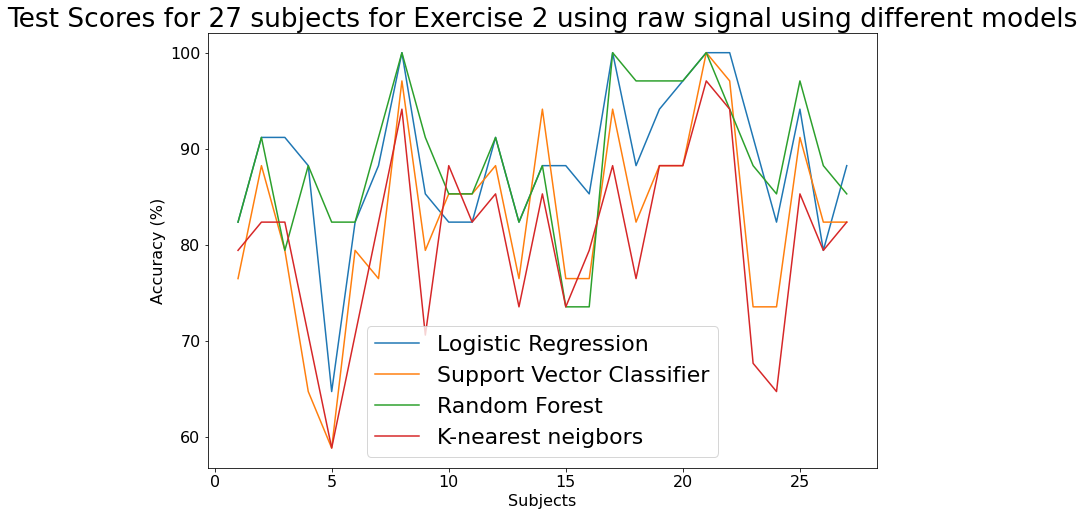

In [98]:
# Plot Average Accuracies for exercise 1
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
plt.rcParams.update({'font.size': 22})

for label, model in models.items():
    ax.plot(np.arange(1,28), test_accuracy_models_ex2[label])

ax.set_title("Test Scores for 27 subjects for Exercise 2 using raw signal using different models")
ax.set_xlabel("Subjects")
ax.set_ylabel("Accuracy (%)")
ax.legend(['Logistic Regression','Support Vector Classifier', 'Random Forest', 'K-nearest neigbors' ]);

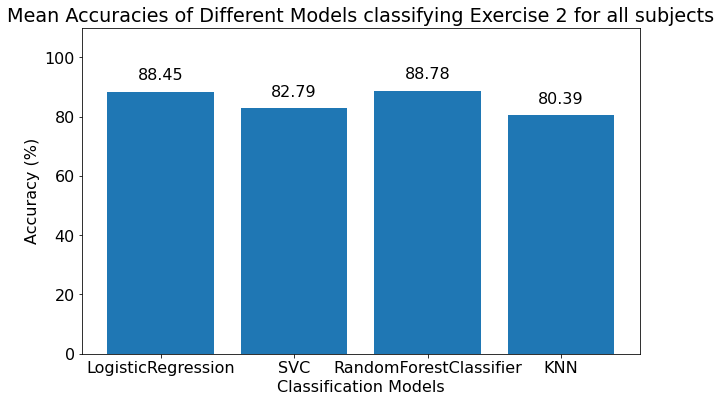

In [99]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

mean_accuracies_ex2 = {}

for label, model in models.items():
    mean_accuracies_ex2[label] = np.mean(test_accuracy_models_ex2[label])

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

ax.bar(mean_accuracies_ex2.keys(), mean_accuracies_ex2.values())
ax.set_title("Mean Accuracies of Different Models classifying Exercise 2 for all subjects")
ax.set_xlabel("Classification Models")
ax.set_ylabel("Accuracy (%)")
ax.set_ylim(0, 110);

rects = ax.patches
for rect, label in zip(rects, mean_accuracies_ex2.values()):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 3, round(label, 2 ), ha='center', va='bottom')

**Exercise 3**

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

np.random.seed(42)

test_accuracy_models_ex3 = {}

# Initialize lists for each model .. Each list should contain 27 values(number of subjects)
for label, model in models.items():
    test_accuracy_models_ex3[label] = []
    
ex3_movements = np.arange(1,24)

# Iterate over 27 subjects of DB1 and trying to classify exercise 3 
for sub in np.arange(1,28):
    
    # Load the data 
    data = load_data_DB1(subject=sub, exercise=3)
    
    # Iterate over all movements and add them into a df
    df = pd.DataFrame()
    for m in ex3_movements:
        df = df.append(get_movement_df(data=data, movement=m, target="restimulus"),ignore_index=True)
    
    # Getting X & y
    X = df.drop("target", axis=1)
    y = df["target"]
        
    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
    
    #Fitting the model
    for label, model in models.items():
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test) * 100
        test_accuracy_models_ex3[label].append(round(score, 3))
        print(f"Test Accuracy for subject {sub} in exercise 3 using {label} is {score}")
    
    print("-----------------------------------------------------------------------------------")

for label, model in models.items():
    print(f"Average Test Accuracy for all subjects in exercise 3 using {label} {np.mean(test_accuracy_models_ex3[label])}")


Test Accuracy for subject 1 in exercise 3 using LogisticRegression is 89.13043478260869
Test Accuracy for subject 1 in exercise 3 using SVC is 78.26086956521739
Test Accuracy for subject 1 in exercise 3 using RandomForestClassifier is 89.13043478260869
Test Accuracy for subject 1 in exercise 3 using KNN is 82.6086956521739
-----------------------------------------------------------------------------------
Test Accuracy for subject 2 in exercise 3 using LogisticRegression is 82.6086956521739
Test Accuracy for subject 2 in exercise 3 using SVC is 71.73913043478261
Test Accuracy for subject 2 in exercise 3 using RandomForestClassifier is 78.26086956521739
Test Accuracy for subject 2 in exercise 3 using KNN is 71.73913043478261
-----------------------------------------------------------------------------------
Test Accuracy for subject 3 in exercise 3 using LogisticRegression is 69.56521739130434
Test Accuracy for subject 3 in exercise 3 using SVC is 67.3913043478261
Test Accuracy for subj

Test Accuracy for subject 21 in exercise 3 using LogisticRegression is 95.65217391304348
Test Accuracy for subject 21 in exercise 3 using SVC is 93.47826086956522
Test Accuracy for subject 21 in exercise 3 using RandomForestClassifier is 95.65217391304348
Test Accuracy for subject 21 in exercise 3 using KNN is 93.47826086956522
-----------------------------------------------------------------------------------
Test Accuracy for subject 22 in exercise 3 using LogisticRegression is 91.30434782608695
Test Accuracy for subject 22 in exercise 3 using SVC is 86.95652173913044
Test Accuracy for subject 22 in exercise 3 using RandomForestClassifier is 91.30434782608695
Test Accuracy for subject 22 in exercise 3 using KNN is 86.95652173913044
-----------------------------------------------------------------------------------
Test Accuracy for subject 23 in exercise 3 using LogisticRegression is 69.56521739130434
Test Accuracy for subject 23 in exercise 3 using SVC is 73.91304347826086
Test Accu

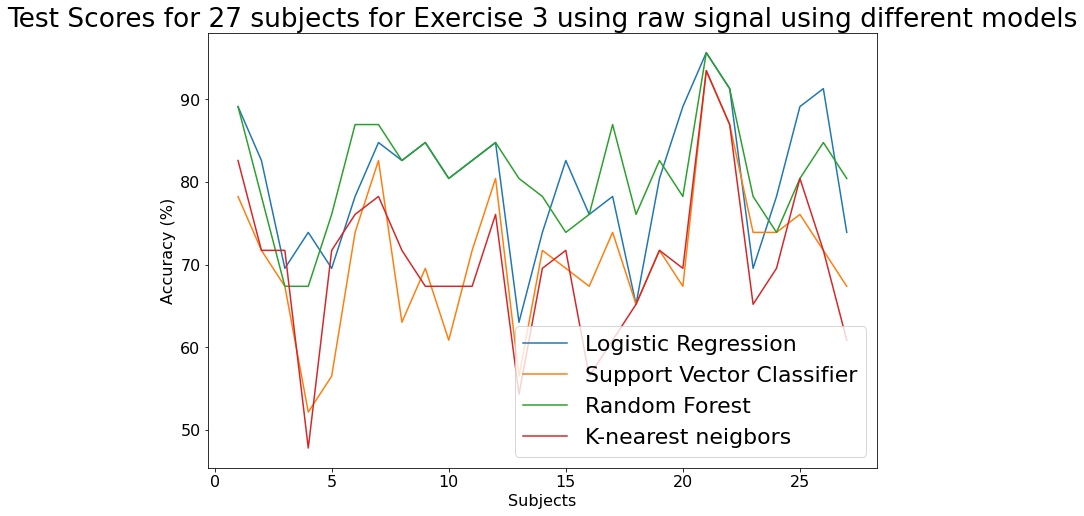

In [105]:
# Plot Average Accuracies for exercise 1
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
plt.rcParams.update({'font.size': 22})

for label, model in models.items():
    ax.plot(np.arange(1,28), test_accuracy_models_ex3[label])

ax.set_title("Test Scores for 27 subjects for Exercise 3 using raw signal using different models")
ax.set_xlabel("Subjects")
ax.set_ylabel("Accuracy (%)")
ax.legend(['Logistic Regression','Support Vector Classifier', 'Random Forest', 'K-nearest neigbors' ]);

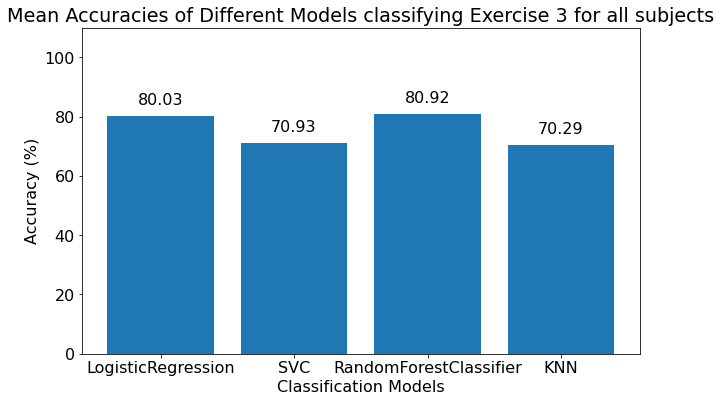

In [106]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

mean_accuracies_ex3 = {}

for label, model in models.items():
    mean_accuracies_ex3[label] = np.mean(test_accuracy_models_ex3[label])

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

ax.bar(mean_accuracies_ex3.keys(), mean_accuracies_ex3.values())
ax.set_title("Mean Accuracies of Different Models classifying Exercise 3 for all subjects")
ax.set_xlabel("Classification Models")
ax.set_ylabel("Accuracy (%)")
ax.set_ylim(0, 110);

rects = ax.patches
for rect, label in zip(rects, mean_accuracies_ex3.values()):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 3, round(label, 2 ), ha='center', va='bottom')

**Comparing average accuracies for all subjects in the different exercises**

In [59]:
ex1_mean = np.mean(test_acc_subjects_ex1)
ex2_mean = np.mean(test_acc_subjects_ex2)
ex3_mean = np.mean(test_acc_subjects_ex3)

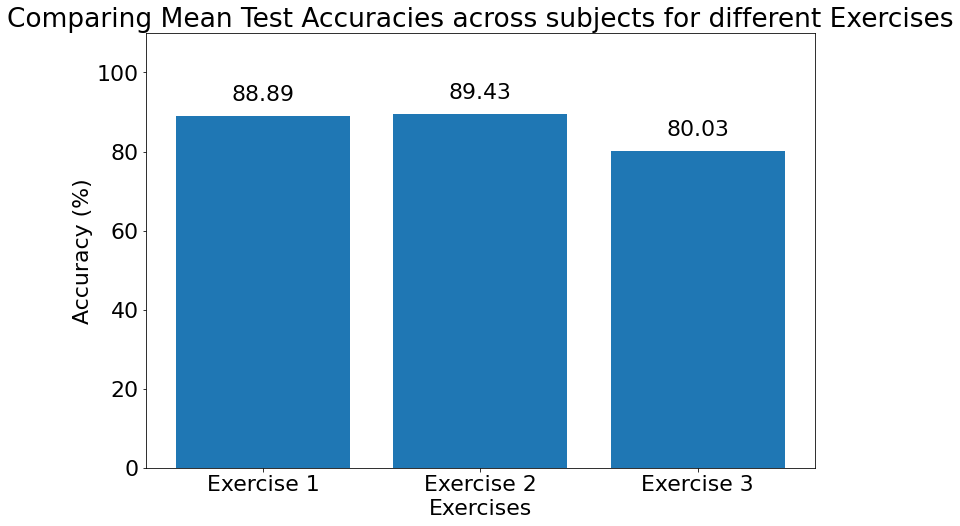

In [173]:
# Plot Bar graph to compare accuracy across exercises
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
plt.rcParams.update({'font.size': 22})

exercises = ["Exercise 1", "Exercise 2", "Exercise 3"]
mean_accs = [ex1_mean, ex2_mean, ex3_mean]
ax.bar(exercises, mean_accs)
ax.set_title("Comparing Mean Test Accuracies across subjects for different Exercises")
ax.set_xlabel("Exercises")
ax.set_ylabel("Accuracy (%)")
ax.set_ylim(0, 110);

rects = ax.patches
for rect, label in zip(rects, mean_accs):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 3, round(label, 2 ), ha='center', va='bottom')

# 2. Classification for movements per exercise using leave-one-out approach

### Classification of exercise 1 movements PER SUBJECT using leave one out method and computing the average for all subjects using RandomForest Classifier

**Data is based on the concatenation of 200 rows of a movement repetition based on restimulus column**
Adding the data for all subjects except 1 to be training data and test the model on a subject it hasn't seen before.

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

models = {"LogisticRegression": LogisticRegression(max_iter=10000, n_jobs=-1),
         "RandomForestClassifier": RandomForestClassifier(n_estimators=100, n_jobs=-1)}

In [28]:
ex1_movements = list(range(1,13))

df = pd.DataFrame()
# Load the data for all subjects except 1 to do leave-one out classification
for s in list(range(1,28)):
    data = load_data_DB1(subject=s, exercise=1)
    # Iterate over all movements and add them into a df
    for m in ex1_movements:
        df = df.append(get_movement_df(data=data, movement=m, target="restimulus"),ignore_index=True)
df

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,target
0,0.0171,0.0073,0.0024,0.0024,0.0024,0.0024,0.0757,0.0317,0.0024,0.0146,...,0.0024,0.0195,0.0024,0.0024,0.0024,0.0146,0.0488,0.0073,0.0024,1
1,0.0488,0.0073,0.0024,0.0024,0.0024,0.0024,0.0171,0.0488,0.0024,0.0049,...,0.0269,0.0024,0.0049,0.0024,0.0024,0.0806,0.0659,0.0024,0.0024,1
2,0.0073,0.0073,0.0024,0.0024,0.0024,0.0024,0.0269,0.0391,0.0024,0.0049,...,0.2197,0.0562,0.0024,0.0024,0.0024,0.1318,0.0439,0.2441,0.0122,1
3,0.0049,0.0024,0.0024,0.0024,0.0024,0.0024,0.0659,0.0342,0.0024,0.0098,...,0.3931,0.2759,0.0171,0.0024,0.0024,0.3101,0.0952,0.5103,0.1880,1
4,0.0024,0.0024,0.0024,0.0049,0.0024,0.0024,0.0098,0.0244,0.0049,0.0024,...,0.1685,0.0024,0.0122,0.0024,0.0024,0.1196,0.0537,0.0513,0.0024,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,0.2075,0.0513,0.0049,0.0024,0.0049,0.0024,0.0049,0.2368,0.0024,0.0146,...,0.3662,0.3564,0.0073,0.0049,0.0024,0.0024,0.3711,0.1196,0.1196,12
3236,0.0537,0.0024,0.0049,0.0024,0.0049,0.0049,0.0049,0.1953,0.0049,0.0391,...,0.0024,0.0146,0.0146,0.0049,0.0024,0.0049,0.5273,0.0488,0.0928,12
3237,0.0391,0.0146,0.0073,0.0024,0.0024,0.0024,0.0049,0.1514,0.0049,0.0879,...,0.0439,0.4736,0.0488,0.0024,0.0024,0.0049,0.3906,0.2881,0.1245,12
3238,0.2246,0.0024,0.0049,0.0049,0.0049,0.0024,0.0049,0.3418,0.0024,0.0708,...,0.0879,0.2368,0.0049,0.0049,0.0049,0.0171,0.3320,0.1367,0.0806,12


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

# training_acc_subjects = []
# test_acc_leave_one_ex1 = []

test_acc_leave_one_ex1 = {}
# Initialize lists for each model .. Each list should contain 27 values(number of subjects)

for label, model in models.items():
    test_acc_leave_one_ex1[label] = []
    
    
# Iterate over 27 subjects of Database 1 and trying to classify exercise 1 
for sub in list(range(1,28)):
    
    start_idx_rows = (sub - 1) * 120
    end_idx_rows = start_idx_rows + 120
    training_data = df.drop(np.arange(start_idx_rows,end_idx_rows), axis=0)
    test_data = df[start_idx_rows:end_idx_rows]
    
    # Prepare X & y for the all-but-one subject and fit the model
    X_train = training_data.drop("target", axis=1)
    y_train = training_data["target"]

    # prepare X_test and y_test
    X_test = test_data.drop("target", axis=1)
    y_test = test_data["target"]
    
    for label, model in models.items():
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test) * 100
        test_acc_leave_one_ex1[label].append(round(score, 3))
        print(f"Test Accuracy leaving subject {sub} out in exercise 1 using {label} is {score}")
    
    print("-----------------------------------------------------------------------------------") 


for label, model in models.items():
    print(f"Average Test Accuracy leaving each subject out once using {label} is {np.mean(test_acc_leave_one_ex1[label])}")


Test Accuracy leaving subject 1 out in exercise 1 using LogisticRegression is 32.5
Test Accuracy leaving subject 1 out in exercise 1 using RandomForestClassifier is 26.666666666666668
-----------------------------------------------------------------------------------
Test Accuracy leaving subject 2 out in exercise 1 using LogisticRegression is 18.333333333333332
Test Accuracy leaving subject 2 out in exercise 1 using RandomForestClassifier is 13.333333333333334
-----------------------------------------------------------------------------------
Test Accuracy leaving subject 3 out in exercise 1 using LogisticRegression is 36.666666666666664
Test Accuracy leaving subject 3 out in exercise 1 using RandomForestClassifier is 45.0
-----------------------------------------------------------------------------------
Test Accuracy leaving subject 4 out in exercise 1 using LogisticRegression is 26.666666666666668
Test Accuracy leaving subject 4 out in exercise 1 using RandomForestClassifier is 32.

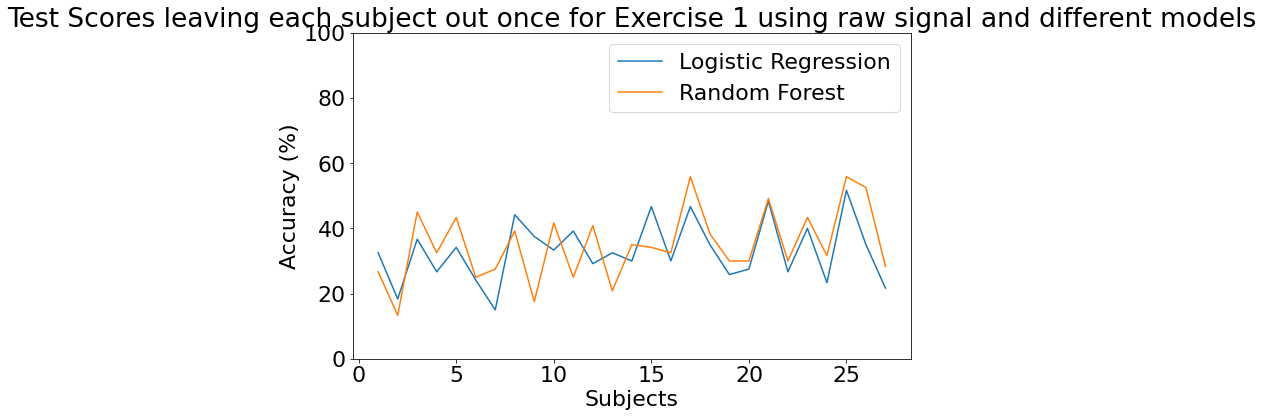

In [36]:
# Plot Average Accuracies for exercise 1
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
plt.rcParams.update({'font.size': 22})

for label, model in models.items():
    ax.plot(np.arange(1,28), test_acc_leave_one_ex1[label])

ax.set_title("Test Scores leaving each subject out once for Exercise 1 using raw signal and different models")
ax.set_xlabel("Subjects")
ax.set_ylabel("Accuracy (%)")
ax.set_ylim(0,100)
ax.legend(['Logistic Regression', 'Random Forest']);

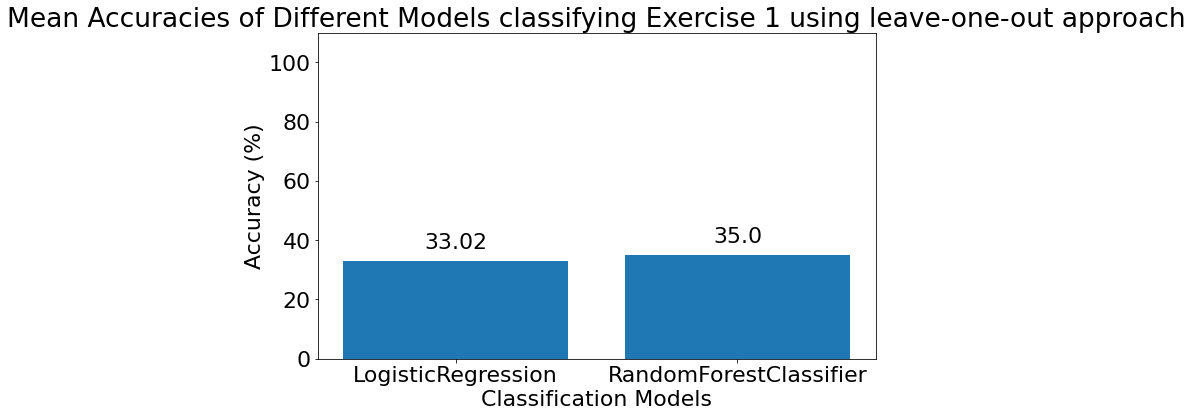

In [37]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

mean_accuracies_leave_one_ex1 = {}

for label, model in models.items():
    mean_accuracies_leave_one_ex1[label] = np.mean(test_acc_leave_one_ex1[label])

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

ax.bar(mean_accuracies_leave_one_ex1.keys(), mean_accuracies_leave_one_ex1.values())
ax.set_title("Mean Accuracies of Different Models classifying Exercise 1 using leave-one-out approach")
ax.set_xlabel("Classification Models")
ax.set_ylabel("Accuracy (%)")
ax.set_ylim(0, 110);

rects = ax.patches
for rect, label in zip(rects, mean_accuracies_leave_one_ex1.values()):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 3, round(label, 2 ), ha='center', va='bottom')

### Classification of exercise 2 movements PER SUBJECT using leave one out method and computing the average for all subjects using RandomForest Classifier

**Data is based on the concatenation of 200 rows of a movement repetition based on restimulus column**
Adding the data for all subjects except 1 to be training data and test the model on a subject it hasn't seen before.

In [38]:
ex2_movements = list(range(1,18))

df = pd.DataFrame()

for s in list(range(1,28)):
    data = load_data_DB1(subject=s, exercise=2)
    # Iterate over all movements and add them into a df
    for m in ex2_movements:
        df = df.append(get_movement_df(data=data, movement=m, target="restimulus"),ignore_index=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,target
0,0.0488,0.0098,0.0024,0.0024,0.0049,0.0024,0.4077,0.1660,0.0024,0.0659,...,2.1631,1.0840,0.4980,0.2295,0.1172,0.5640,2.9077,1.0693,0.8081,1
1,0.1294,0.0220,0.0024,0.0024,0.0024,0.0024,0.3149,0.1294,0.0049,0.0977,...,1.3452,0.5273,0.1660,0.0757,0.0293,0.2954,3.0469,0.8691,0.4443,1
2,0.0513,0.0049,0.0024,0.0024,0.0024,0.0024,0.3467,0.1416,0.0024,0.0391,...,0.3516,0.1050,0.0195,0.0024,0.0024,0.0757,0.7007,0.1318,0.0293,1
3,0.0195,0.0244,0.0024,0.0024,0.0024,0.0024,0.0635,0.0806,0.0024,0.0122,...,0.3540,0.1025,0.0195,0.0024,0.0146,0.1538,0.5933,0.1074,0.0757,1
4,0.0244,0.0024,0.0024,0.0024,0.0024,0.0024,0.1587,0.0757,0.0024,0.0024,...,0.0757,0.0854,0.0024,0.0024,0.0024,0.0342,0.4907,0.0195,0.0049,1


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

# training_acc_subjects = []
# test_acc_leave_one_ex2 = []

test_acc_leave_one_ex2 = {}
# Initialize lists for each model .. Each list should contain 27 values(number of subjects)

for label, model in models.items():
    test_acc_leave_one_ex2[label] = []
    
    
# Iterate over 27 subjects of Database 1 and trying to classify exercise 2
for sub in list(range(1,28)):
    
    start_idx_rows = (sub - 1) * 120
    end_idx_rows = start_idx_rows + 120
    training_data = df.drop(np.arange(start_idx_rows,end_idx_rows), axis=0)
    test_data = df[start_idx_rows:end_idx_rows]
    
    # Prepare X & y for the all-but-one subject and fit the model
    X_train = training_data.drop("target", axis=1)
    y_train = training_data["target"]

    # prepare X_test and y_test
    X_test = test_data.drop("target", axis=1)
    y_test = test_data["target"]
    
    for label, model in models.items():
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test) * 100
        test_acc_leave_one_ex2[label].append(round(score, 3))
        print(f"Test Accuracy leaving subject {sub} out in exercise 2 using {label} is {score}")
    
    print("-----------------------------------------------------------------------------------") 


for label, model in models.items():
    print(f"Average Test Accuracy for Exercise 2 leaving each subject out once using {label} is {np.mean(test_acc_leave_one_ex2[label])}")


Test Accuracy leaving subject 1 out in exercise 2 using LogisticRegression is 25.0
Test Accuracy leaving subject 1 out in exercise 2 using RandomForestClassifier is 37.5
-----------------------------------------------------------------------------------
Test Accuracy leaving subject 2 out in exercise 2 using LogisticRegression is 27.500000000000004
Test Accuracy leaving subject 2 out in exercise 2 using RandomForestClassifier is 29.166666666666668
-----------------------------------------------------------------------------------
Test Accuracy leaving subject 3 out in exercise 2 using LogisticRegression is 8.333333333333332
Test Accuracy leaving subject 3 out in exercise 2 using RandomForestClassifier is 16.666666666666664
-----------------------------------------------------------------------------------
Test Accuracy leaving subject 4 out in exercise 2 using LogisticRegression is 37.5
Test Accuracy leaving subject 4 out in exercise 2 using RandomForestClassifier is 47.5
-------------

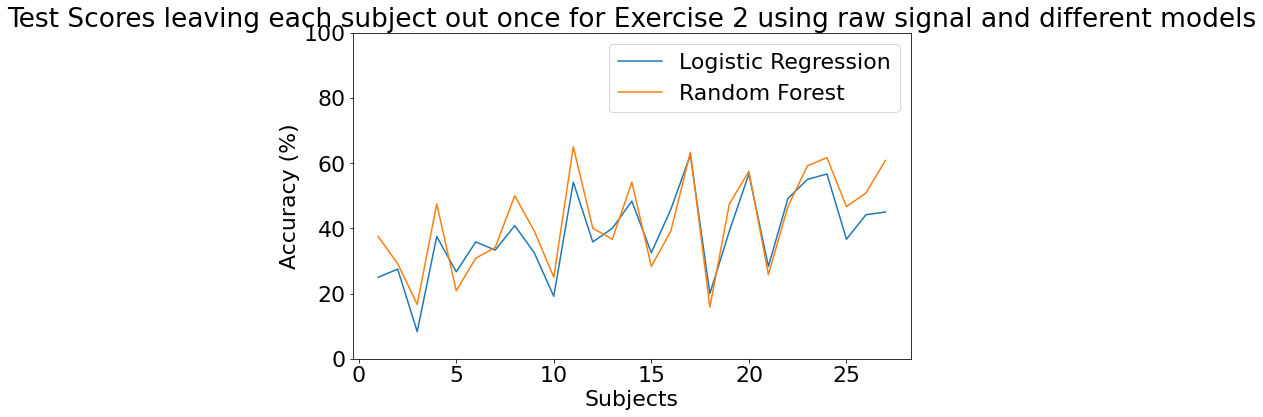

In [41]:
# Plot Average Accuracies for exercise 1
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
plt.rcParams.update({'font.size': 22})

for label, model in models.items():
    ax.plot(np.arange(1,28), test_acc_leave_one_ex2[label])

ax.set_title("Test Scores leaving each subject out once for Exercise 2 using raw signal and different models")
ax.set_xlabel("Subjects")
ax.set_ylabel("Accuracy (%)")
ax.set_ylim(0,100)
ax.legend(['Logistic Regression', 'Random Forest']);

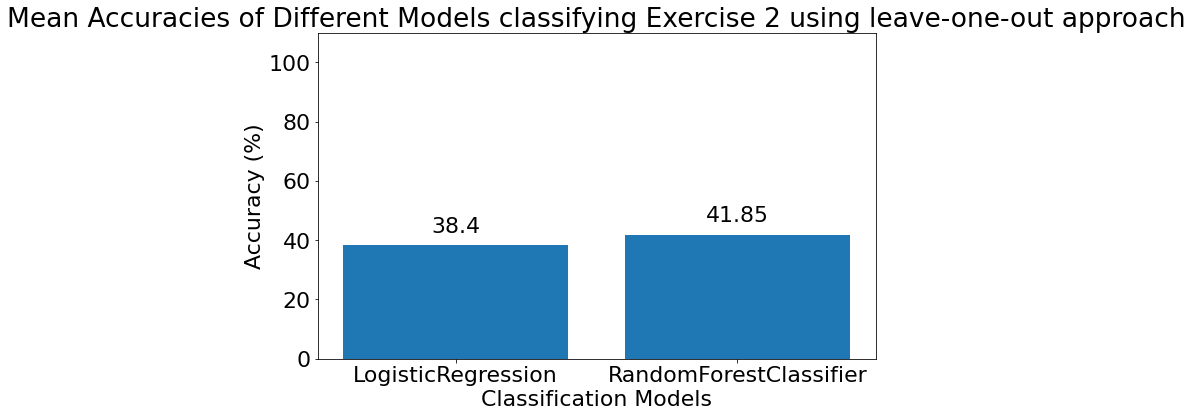

In [42]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

mean_accuracies_leave_one_ex2 = {}

for label, model in models.items():
    mean_accuracies_leave_one_ex2[label] = np.mean(test_acc_leave_one_ex2[label])

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

ax.bar(mean_accuracies_leave_one_ex2.keys(), mean_accuracies_leave_one_ex2.values())
ax.set_title("Mean Accuracies of Different Models classifying Exercise 2 using leave-one-out approach")
ax.set_xlabel("Classification Models")
ax.set_ylabel("Accuracy (%)")
ax.set_ylim(0, 110);

rects = ax.patches
for rect, label in zip(rects, mean_accuracies_leave_one_ex2.values()):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 3, round(label, 2 ), ha='center', va='bottom')

### Classification of exercise 3 movements PER SUBJECT using leave one out method and computing the average for all subjects using RandomForest Classifier

**Data is based on the concatenation of 200 rows of a movement repetition based on restimulus column**
Adding the data for all subjects except 1 to be training data and test the model on a subject it hasn't seen before.

In [43]:
ex3_movements = list(range(1,24))

df = pd.DataFrame()

for s in list(range(1,28)):
    data = load_data_DB1(subject=s, exercise=3)
    # Iterate over all movements and add them into a df
    for m in ex3_movements:
        df = df.append(get_movement_df(data=data, movement=m, target="restimulus"),ignore_index=True)
df

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,target
0,0.0122,0.0024,0.0122,0.0024,0.0073,0.0024,0.0122,0.0659,0.0024,0.0439,...,0.1685,0.9302,0.0073,0.0098,0.0513,0.5688,0.4321,0.4810,0.0757,1
1,0.0049,0.0024,0.0024,0.0024,0.0098,0.0024,0.0293,0.0903,0.0024,0.0391,...,0.0464,0.6567,0.2197,0.0024,0.0024,0.1245,0.1074,0.1831,0.0757,1
2,0.0098,0.0024,0.0024,0.0024,0.0098,0.0024,0.0024,0.1538,0.0024,0.0513,...,0.1538,0.8008,0.0146,0.0293,0.0903,0.6177,0.3052,0.3198,0.1025,1
3,0.0220,0.0024,0.0024,0.0024,0.0098,0.0049,0.0098,0.1050,0.0024,0.0513,...,0.1245,0.7544,0.0220,0.0024,0.0171,0.4883,0.2710,0.4492,0.0757,1
4,0.0146,0.0024,0.0024,0.0024,0.0049,0.0049,0.0317,0.1465,0.0024,0.0488,...,0.1465,0.5444,0.0146,0.0635,0.1074,0.7007,0.2930,0.1123,0.0708,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6205,0.6982,0.1538,0.4712,0.0195,0.0049,0.0024,0.0342,0.4712,1.1426,0.0732,...,0.7837,0.7764,0.2197,0.1538,0.0903,0.6226,1.0596,0.1489,0.0977,23
6206,0.2686,0.0537,0.1929,0.0049,0.0049,0.0024,0.0073,0.2075,0.1147,0.0635,...,1.1035,0.8374,0.2637,0.0562,0.0659,0.4175,0.5835,0.2637,0.0537,23
6207,0.3491,0.1392,0.3320,0.0049,0.0024,0.0024,0.0122,0.2515,0.0732,0.0586,...,0.5273,0.4785,0.1025,0.0098,0.0439,0.3735,0.4492,0.1563,0.0732,23
6208,0.0757,0.0049,0.1172,0.0049,0.0049,0.0024,0.0049,0.0977,0.0659,0.0684,...,0.4639,0.1538,0.0659,0.0122,0.0146,0.6006,0.5444,0.1514,0.0684,23


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

# training_acc_subjects = []
# test_acc_leave_one_ex3 = []

test_acc_leave_one_ex3 = {}
# Initialize lists for each model .. Each list should contain 27 values(number of subjects)

for label, model in models.items():
    test_acc_leave_one_ex3[label] = []
    
    
# Iterate over 27 subjects of Database 1 and trying to classify exercise 2
for sub in list(range(1,28)):
    
    start_idx_rows = (sub - 1) * 120
    end_idx_rows = start_idx_rows + 120
    training_data = df.drop(np.arange(start_idx_rows,end_idx_rows), axis=0)
    test_data = df[start_idx_rows:end_idx_rows]
    
    # Prepare X & y for the all-but-one subject and fit the model
    X_train = training_data.drop("target", axis=1)
    y_train = training_data["target"]

    # prepare X_test and y_test
    X_test = test_data.drop("target", axis=1)
    y_test = test_data["target"]
    
    for label, model in models.items():
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test) * 100
        test_acc_leave_one_ex3[label].append(round(score, 3))
        print(f"Test Accuracy leaving subject {sub} out in exercise 3 using {label} is {score}")
    
    print("-----------------------------------------------------------------------------------") 


for label, model in models.items():
    print(f"Average Test Accuracy for Exercise 3 leaving each subject out once using {label} is {np.mean(test_acc_leave_one_ex3[label])}")


Test Accuracy leaving subject 1 out in exercise 3 using LogisticRegression is 9.166666666666666
Test Accuracy leaving subject 1 out in exercise 3 using RandomForestClassifier is 8.333333333333332
-----------------------------------------------------------------------------------
Test Accuracy leaving subject 2 out in exercise 3 using LogisticRegression is 28.333333333333332
Test Accuracy leaving subject 2 out in exercise 3 using RandomForestClassifier is 27.500000000000004
-----------------------------------------------------------------------------------
Test Accuracy leaving subject 3 out in exercise 3 using LogisticRegression is 7.5
Test Accuracy leaving subject 3 out in exercise 3 using RandomForestClassifier is 4.166666666666666
-----------------------------------------------------------------------------------
Test Accuracy leaving subject 4 out in exercise 3 using LogisticRegression is 15.0
Test Accuracy leaving subject 4 out in exercise 3 using RandomForestClassifier is 18.3333

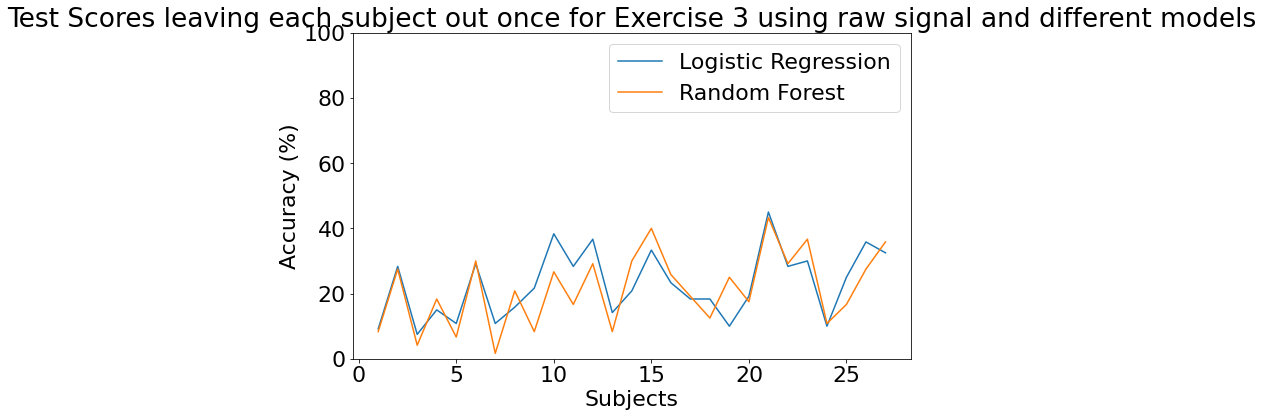

In [45]:
# Plot Average Accuracies for exercise 1
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
plt.rcParams.update({'font.size': 22})

for label, model in models.items():
    ax.plot(np.arange(1,28), test_acc_leave_one_ex3[label])

ax.set_title("Test Scores leaving each subject out once for Exercise 3 using raw signal and different models")
ax.set_xlabel("Subjects")
ax.set_ylabel("Accuracy (%)")
ax.set_ylim(0,100)
ax.legend(['Logistic Regression', 'Random Forest']);

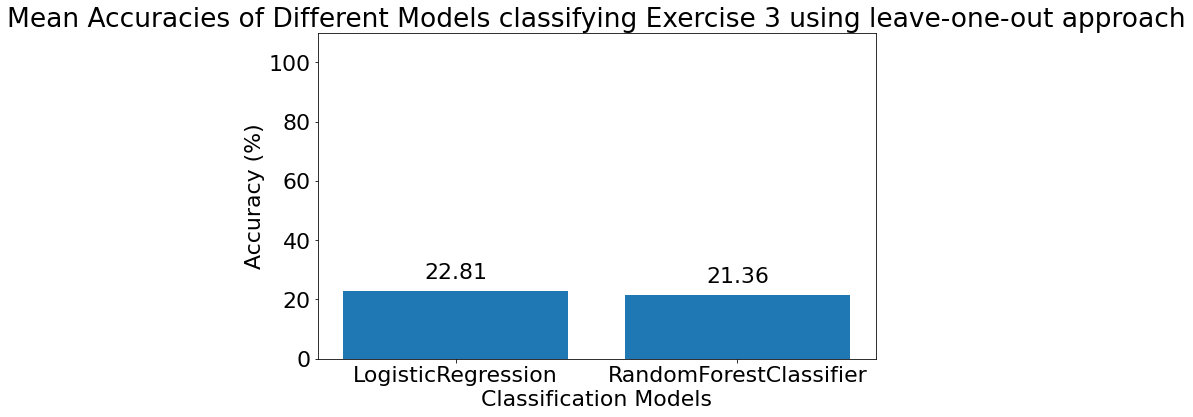

In [46]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

mean_accuracies_leave_one_ex3 = {}

for label, model in models.items():
    mean_accuracies_leave_one_ex3[label] = np.mean(test_acc_leave_one_ex3[label])

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

ax.bar(mean_accuracies_leave_one_ex3.keys(), mean_accuracies_leave_one_ex3.values())
ax.set_title("Mean Accuracies of Different Models classifying Exercise 3 using leave-one-out approach")
ax.set_xlabel("Classification Models")
ax.set_ylabel("Accuracy (%)")
ax.set_ylim(0, 110);

rects = ax.patches
for rect, label in zip(rects, mean_accuracies_leave_one_ex3.values()):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 3, round(label, 2 ), ha='center', va='bottom')

In [176]:
ex1_mean = np.mean(test_acc_leave_one_ex1)
ex2_mean = np.mean(test_acc_leave_one_ex2)
ex3_mean = np.mean(test_acc_leave_one_ex3)

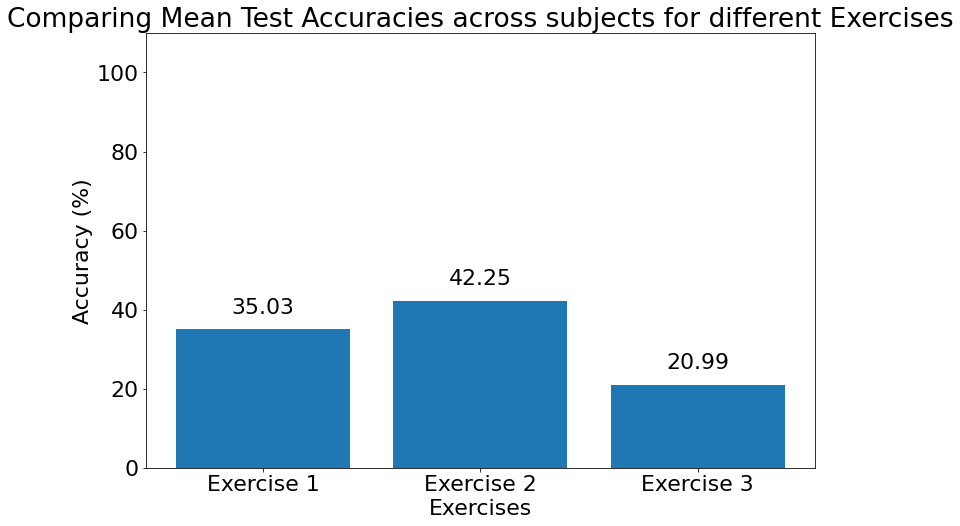

In [177]:
# Plot Bar graph to compare accuracy across exercises
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
plt.rcParams.update({'font.size': 22})

exercises = ["Exercise 1", "Exercise 2", "Exercise 3"]
mean_accs = [ex1_mean, ex2_mean, ex3_mean]
ax.bar(exercises, mean_accs)
ax.set_title("Comparing Mean Test Accuracies across subjects for each Exercise")
ax.set_xlabel("Exercises")
ax.set_ylabel("Accuracy (%)")
ax.set_ylim(0, 110);

rects = ax.patches
for rect, label in zip(rects, mean_accs):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 3, round(label, 2 ), ha='center', va='bottom')

# 3. Classification of 52 movements per subject

In [143]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

models = {"LogisticRegression": LogisticRegression(max_iter=10000, n_jobs=-1),
         "RandomForestClassifier": RandomForestClassifier(n_estimators=100, n_jobs=-1)}

In [145]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

np.random.seed(42)

test_accuracy_all = {}

for label, model in models.items():
    test_accuracy_all[label] = []
    
ex1_movements = list(range(1,13))
ex2_movements = list(range(1,18))
ex3_movements = list(range(1,24))

# Iterate over 27 subjects of DB1 and trying to classify all exercises combined
for sub in list(range(1,28)):
    
    # Load the data for exercise 1
    data = load_data_DB1(subject=sub, exercise=1)
    
    # Iterate over all movements and add exercise 1 movement repetitions into a df
    ex1_df = pd.DataFrame()
    for m in ex1_movements:
        ex1_df = ex1_df.append(get_movement_df(data=data, movement=m, target="restimulus"),ignore_index=True)
    
    
    # Load the data for exercise 2
    data = load_data_DB1(subject=sub, exercise=2)

    # Iterate over all movements and add exercise 2 movement repetitions into a df
    ex2_df = pd.DataFrame()
    for m in ex2_movements:
        ex2_df = ex2_df.append(get_movement_df(data=data, movement=m, target="restimulus"),ignore_index=True)
    
    # Add 12 to target column of exercise 2 dataframe. The 12 number represents the number of movements in exercise 1
    ex2_df["target"] = ex2_df["target"] + 12
    
    # Load the data for exercise 3
    data = load_data_DB1(subject=sub, exercise=3)
    
    # Iterate over all movements and add exercise 3 movement repetitions into a df
    ex3_df = pd.DataFrame()
    for m in ex3_movements:
        ex3_df = ex3_df.append(get_movement_df(data=data, movement=m, target="restimulus"),ignore_index=True)
    
    # Add 29 to target column of exercise 3 dataframe. 
    # The 29 number represents the number of movements in exercise 1 plus the number of movements in exercise 2.
    ex3_df["target"] = ex3_df["target"] + 29
    
    data_df = pd.DataFrame() # A dataframe to hold data of all movements combined
    
    # Append 3 exercises to one dataframe
    data_df = data_df.append(ex1_df, ignore_index=True)
    data_df = data_df.append(ex2_df, ignore_index=True)
    data_df = data_df.append(ex3_df, ignore_index=True)
    
    
    # Getting X & y
    X = data_df.drop("target", axis=1)
    y = data_df["target"]

    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
    
    # Fit models in the dictionary
    for label, model in models.items():
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test) * 100
        test_accuracy_all[label].append(round(score, 3))
        print(f"Test Accuracy for subject {sub} classifying all 52 movements using {label} is {score}")
    
    print("-----------------------------------------------------------------------------------")
        

for label, model in models.items():
    print(f"Average Test Accuracy for all subjects for all 52 movements using {label} {np.mean(test_accuracy_all[label])}")



Test Accuracy for subject 1 classifying all 52 movements using LogisticRegression is 76.92307692307693
Test Accuracy for subject 1 classifying all 52 movements using RandomForestClassifier is 80.76923076923077
-----------------------------------------------------------------------------------
Test Accuracy for subject 2 classifying all 52 movements using LogisticRegression is 85.57692307692307
Test Accuracy for subject 2 classifying all 52 movements using RandomForestClassifier is 77.88461538461539
-----------------------------------------------------------------------------------
Test Accuracy for subject 3 classifying all 52 movements using LogisticRegression is 72.11538461538461
Test Accuracy for subject 3 classifying all 52 movements using RandomForestClassifier is 73.07692307692307
-----------------------------------------------------------------------------------
Test Accuracy for subject 4 classifying all 52 movements using LogisticRegression is 76.92307692307693
Test Accuracy f

TypeError: unsupported operand type(s) for /: 'dict' and 'int'

In [146]:
for label, model in models.items():
    print(f"Average Test Accuracy for all subjects for all 52 movements using {label} {np.mean(test_accuracy_all[label])}")


Average Test Accuracy for all subjects for all 52 movements using LogisticRegression 80.62670370370371
Average Test Accuracy for all subjects for all 52 movements using RandomForestClassifier 82.0512962962963


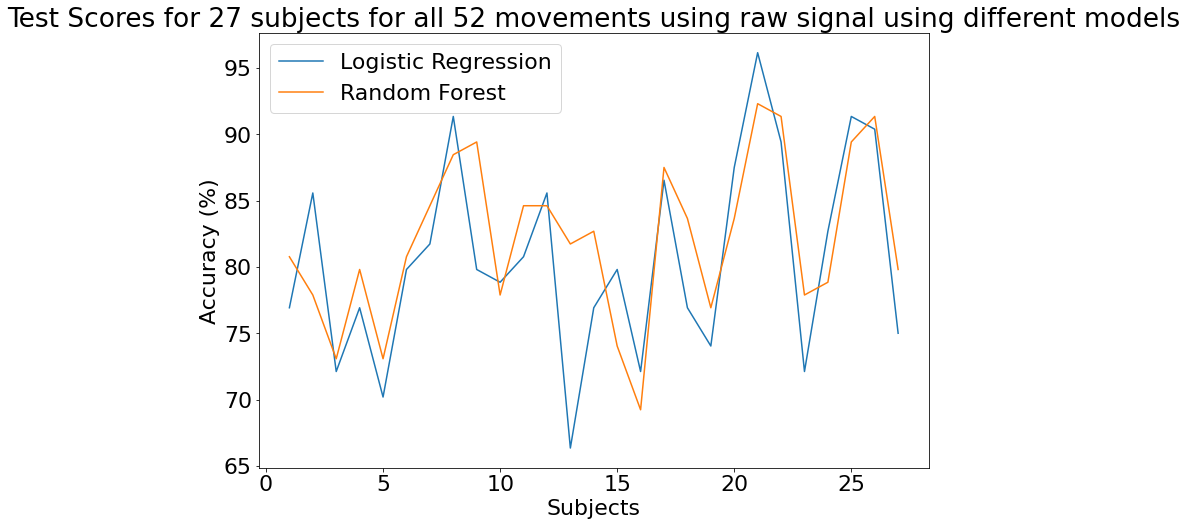

In [147]:
# Plot Average Accuracies for exercise 1
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
plt.rcParams.update({'font.size': 22})

for label, model in models.items():
    ax.plot(np.arange(1,28), test_accuracy_all[label])

ax.set_title("Test Scores for 27 subjects for all 52 movements using raw signal using different models")
ax.set_xlabel("Subjects")
ax.set_ylabel("Accuracy (%)")
ax.legend(['Logistic Regression','Random Forest']);

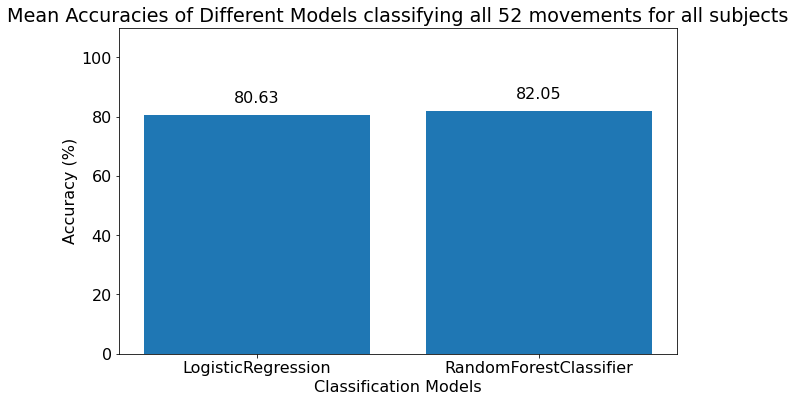

In [148]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

mean_accuracies_all = {}

for label, model in models.items():
    mean_accuracies_all[label] = np.mean(test_accuracy_all[label])

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

ax.bar(mean_accuracies_all.keys(), mean_accuracies_all.values())
ax.set_title("Mean Accuracies of Different Models classifying all 52 movements for all subjects")
ax.set_xlabel("Classification Models")
ax.set_ylabel("Accuracy (%)")
ax.set_ylim(0, 110);

rects = ax.patches
for rect, label in zip(rects, mean_accuracies_all.values()):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 3, round(label, 2 ), ha='center', va='bottom')

## Hyperparameter tuning

In [9]:
np.arange(10,100,10)

array([10, 20, 30, 40, 50, 60, 70, 80, 90])

In [10]:
# Creating hyperparameter grid for random forest
rf_grid = {"n_estimators":np.arange(10,500,20),
          "max_depth":[None, 3, 5, 10],
          "min_samples_split":np.arange(2,20,2),
          "min_samples_leaf":np.arange(1,20,2),
          "max_features":["auto", "sqrt"]}

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, RandomizedSearchCV

np.random.seed(42)

test_accuracy_rf_hp = []

ex1_movements = list(range(1,13))
ex2_movements = list(range(1,18))
ex3_movements = list(range(1,24))

# Iterate over 27 subjects of DB1 and trying to classify all exercises combined
for sub in list(range(1,28)):
    
    # Load the data for exercise 1
    data = load_data_DB1(subject=sub, exercise=1)
    
    # Iterate over all movements and add exercise 1 movement repetitions into a df
    ex1_df = pd.DataFrame()
    for m in ex1_movements:
        ex1_df = ex1_df.append(get_movement_df(data=data, movement=m, target="restimulus"),ignore_index=True)
    
    
    # Load the data for exercise 2
    data = load_data_DB1(subject=sub, exercise=2)

    # Iterate over all movements and add exercise 2 movement repetitions into a df
    ex2_df = pd.DataFrame()
    for m in ex2_movements:
        ex2_df = ex2_df.append(get_movement_df(data=data, movement=m, target="restimulus"),ignore_index=True)
    
    # Add 12 to target column of exercise 2 dataframe. The 12 number represents the number of movements in exercise 1
    ex2_df["target"] = ex2_df["target"] + 12
    
    # Load the data for exercise 3
    data = load_data_DB1(subject=sub, exercise=3)
    
    # Iterate over all movements and add exercise 3 movement repetitions into a df
    ex3_df = pd.DataFrame()
    for m in ex3_movements:
        ex3_df = ex3_df.append(get_movement_df(data=data, movement=m, target="restimulus"),ignore_index=True)
    
    # Add 29 to target column of exercise 3 dataframe. 
    # The 29 number represents the number of movements in exercise 1 plus the number of movements in exercise 2.
    ex3_df["target"] = ex3_df["target"] + 29
    
    data_df = pd.DataFrame() # A dataframe to hold data of all movements combined
    
    # Append 3 exercises to one dataframe
    data_df = data_df.append(ex1_df, ignore_index=True)
    data_df = data_df.append(ex2_df, ignore_index=True)
    data_df = data_df.append(ex3_df, ignore_index=True)
    
    
    # Getting X & y
    X = data_df.drop("target", axis=1)
    y = data_df["target"]

    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
    
    # Fit models in the dictionary
    randomizedSearch_reg = RandomizedSearchCV(estimator=RandomForestClassifier(n_jobs=-1),
                                             param_distributions=rf_grid,
                                             cv=5,
                                             n_iter=20,
                                             verbose=True)

    randomizedSearch_reg.fit(X_train, y_train)
    
    score = randomizedSearch_reg.score(X_test, y_test)
    test_accuracy_rf_hp.append(score)
    print(f'Best Params: {randomizedSearch_reg.best_params_}')
    print(f'Test Accuracy classifying 52 movements after Hyperparameter tuning: {score}')
    print("-----------------------------------------------------------------------------------")
        

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Params: {'n_estimators': 170, 'min_samples_split': 16, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}
Test Accuracy classifying 52 movements after Hyperparameter tuning: 0.7403846153846154
-----------------------------------------------------------------------------------
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Params: {'n_estimators': 450, 'min_samples_split': 12, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 10}
Test Accuracy classifying 52 movements after Hyperparameter tuning: 0.7307692307692307
-----------------------------------------------------------------------------------
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Params: {'n_estimators': 390, 'min_samples_split': 16, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': None}
Test Accuracy classifying 52 movements after Hyperparameter tuning: 0.6730769230769231
---------

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Params: {'n_estimators': 90, 'min_samples_split': 12, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': None}
Test Accuracy classifying 52 movements after Hyperparameter tuning: 0.7788461538461539
-----------------------------------------------------------------------------------
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Params: {'n_estimators': 170, 'min_samples_split': 12, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': None}
Test Accuracy classifying 52 movements after Hyperparameter tuning: 0.8173076923076923
-----------------------------------------------------------------------------------
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Params: {'n_estimators': 270, 'min_samples_split': 14, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}
Test Accuracy classifying 52 movements after Hyperparameter tuning: 0.8653846153846154
--------

In [12]:
np.mean(test_accuracy_rf_hp)

0.7852564102564105

# 4. Classification of 52 movements using leave-one-out approach 

In [47]:
ex1_movements = list(range(1,13))
ex2_movements = list(range(1,18))
ex3_movements = list(range(1,24))

all_exercises_df = pd.DataFrame()
# Load the data for all subjects except 1 to do leave-one out classification
for s in list(range(1,28)):
    ex1_df = pd.DataFrame()
    data = load_data_DB1(subject=s, exercise=1)
    # Iterate over all movements and add them into a df
    for m in ex1_movements:
        ex1_df = ex1_df.append(get_movement_df(data=data, movement=m, target="restimulus"),ignore_index=True)
        
    ex2_df = pd.DataFrame()
    data = load_data_DB1(subject=s, exercise=2)
    # Iterate over all movements and add them into a df
    for m in ex2_movements:
        ex2_df = ex2_df.append(get_movement_df(data=data, movement=m, target="restimulus"),ignore_index=True)
    
    ex2_df["target"] = ex2_df["target"] + 12
    
    ex3_df = pd.DataFrame()
    data = load_data_DB1(subject=s, exercise=3)
    # Iterate over all movements and add them into a df
    for m in ex3_movements:
        ex3_df = ex3_df.append(get_movement_df(data=data, movement=m, target="restimulus"),ignore_index=True)
        
    ex3_df["target"] = ex3_df["target"] + 12 + 17
    all_exercises_df = all_exercises_df.append(ex1_df, ignore_index=True)
    all_exercises_df = all_exercises_df.append(ex2_df, ignore_index=True)
    all_exercises_df = all_exercises_df.append(ex3_df, ignore_index=True)
all_exercises_df

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,target
0,0.0171,0.0073,0.0024,0.0024,0.0024,0.0024,0.0757,0.0317,0.0024,0.0146,...,0.0024,0.0195,0.0024,0.0024,0.0024,0.0146,0.0488,0.0073,0.0024,1
1,0.0488,0.0073,0.0024,0.0024,0.0024,0.0024,0.0171,0.0488,0.0024,0.0049,...,0.0269,0.0024,0.0049,0.0024,0.0024,0.0806,0.0659,0.0024,0.0024,1
2,0.0073,0.0073,0.0024,0.0024,0.0024,0.0024,0.0269,0.0391,0.0024,0.0049,...,0.2197,0.0562,0.0024,0.0024,0.0024,0.1318,0.0439,0.2441,0.0122,1
3,0.0049,0.0024,0.0024,0.0024,0.0024,0.0024,0.0659,0.0342,0.0024,0.0098,...,0.3931,0.2759,0.0171,0.0024,0.0024,0.3101,0.0952,0.5103,0.1880,1
4,0.0024,0.0024,0.0024,0.0049,0.0024,0.0024,0.0098,0.0244,0.0049,0.0024,...,0.1685,0.0024,0.0122,0.0024,0.0024,0.1196,0.0537,0.0513,0.0024,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14035,0.6982,0.1538,0.4712,0.0195,0.0049,0.0024,0.0342,0.4712,1.1426,0.0732,...,0.7837,0.7764,0.2197,0.1538,0.0903,0.6226,1.0596,0.1489,0.0977,52
14036,0.2686,0.0537,0.1929,0.0049,0.0049,0.0024,0.0073,0.2075,0.1147,0.0635,...,1.1035,0.8374,0.2637,0.0562,0.0659,0.4175,0.5835,0.2637,0.0537,52
14037,0.3491,0.1392,0.3320,0.0049,0.0024,0.0024,0.0122,0.2515,0.0732,0.0586,...,0.5273,0.4785,0.1025,0.0098,0.0439,0.3735,0.4492,0.1563,0.0732,52
14038,0.0757,0.0049,0.1172,0.0049,0.0049,0.0024,0.0049,0.0977,0.0659,0.0684,...,0.4639,0.1538,0.0659,0.0122,0.0146,0.6006,0.5444,0.1514,0.0684,52


In [64]:
all_exercises_df['target'] = all_exercises_df['target'].astype(int)

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

models = {"LogisticRegression": LogisticRegression(max_iter=10000, n_jobs=-1),
         "RandomForestClassifier": RandomForestClassifier(n_estimators=100, n_jobs=-1)}

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

test_acc_leave_one_all = {}

# Initialize lists for each model .. Each list should contain 27 values(number of subjects)
for label, model in models.items():
    test_acc_leave_one_all[label] = []
    
    
# Iterate over 27 subjects of Database 1 and trying to classify all exercises combined
for sub in list(range(1,28)):
    
    start_idx_rows = (sub - 1) * (120 + 170 + 230)
    end_idx_rows = start_idx_rows + (120 + 170 + 230)
    training_data = all_exercises_df.drop(np.arange(start_idx_rows,end_idx_rows), axis=0)
    test_data = all_exercises_df[start_idx_rows:end_idx_rows]
    
    # Prepare X & y for the all-but-one subject and fit the model
    X_train = training_data.drop("target", axis=1)
    y_train = training_data["target"]

    # prepare X_test and y_test
    X_test = test_data.drop("target", axis=1)
    y_test = test_data["target"]
    
    for label, model in models.items():
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test) * 100
        test_acc_leave_one_all[label].append(round(score, 3))
        print(f"Test Accuracy leaving subject {sub} out for all movements using {label} is {score}")
    
    print("-----------------------------------------------------------------------------------") 


for label, model in models.items():
    print(f"Average Test Accuracy for all movements leaving each subject out once using {label} is {np.mean(test_acc_leave_one_all[label])}")


Test Accuracy leaving subject 1 out for all movements using LogisticRegression is 15.576923076923077
Test Accuracy leaving subject 1 out for all movements using RandomForestClassifier is 20.192307692307693
-----------------------------------------------------------------------------------
Test Accuracy leaving subject 2 out for all movements using LogisticRegression is 3.4615384615384617
Test Accuracy leaving subject 2 out for all movements using RandomForestClassifier is 7.115384615384615
-----------------------------------------------------------------------------------
Test Accuracy leaving subject 3 out for all movements using LogisticRegression is 19.615384615384617
Test Accuracy leaving subject 3 out for all movements using RandomForestClassifier is 27.692307692307693
-----------------------------------------------------------------------------------
Test Accuracy leaving subject 4 out for all movements using LogisticRegression is 18.653846153846153
Test Accuracy leaving subject 

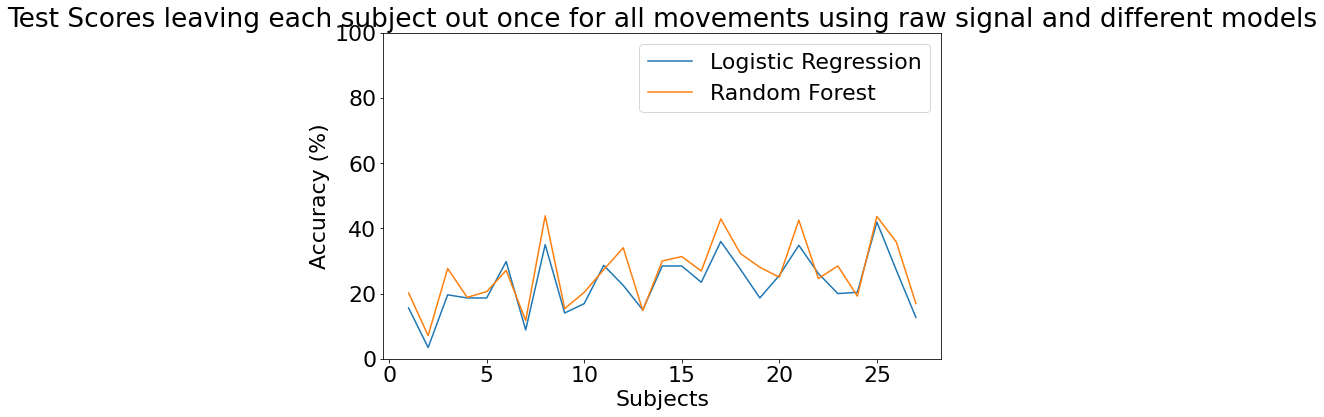

In [77]:
# Plot Average Accuracies for exercise 1
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
plt.rcParams.update({'font.size': 22})

for label, model in models.items():
    ax.plot(np.arange(1,28), test_acc_leave_one_all[label])

ax.set_title("Test Scores leaving each subject out once for all movements using raw signal and different models")
ax.set_xlabel("Subjects")
ax.set_ylabel("Accuracy (%)")
ax.set_ylim(0,100)
ax.legend(['Logistic Regression', 'Random Forest']);

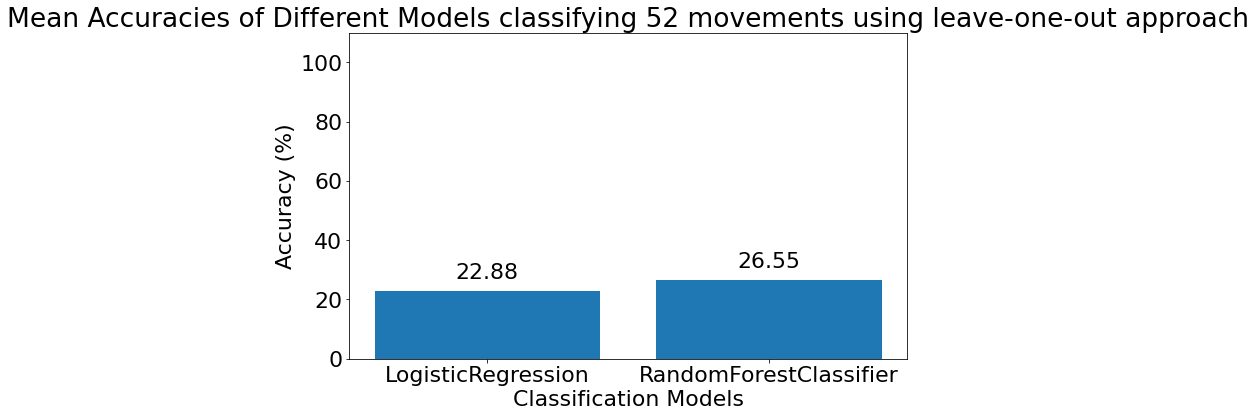

In [78]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

mean_accuracies_leave_one_all = {}

for label, model in models.items():
    mean_accuracies_leave_one_all[label] = np.mean(test_acc_leave_one_all[label])

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

ax.bar(mean_accuracies_leave_one_all.keys(), mean_accuracies_leave_one_all.values())
ax.set_title("Mean Accuracies of Different Models classifying 52 movements using leave-one-out approach")
ax.set_xlabel("Classification Models")
ax.set_ylabel("Accuracy (%)")
ax.set_ylim(0, 110);

rects = ax.patches
for rect, label in zip(rects, mean_accuracies_leave_one_all.values()):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 3, round(label, 2 ), ha='center', va='bottom')